<a href="https://colab.research.google.com/github/sanchitkalra/bits-f312-nnfl/blob/main/Assignment_1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

In [16]:
pip install openpyxl==3.0.9

In [17]:
def cost_function(X,y,w,lamb, l2 = True): # define cost function
  hypothesis = np.dot(X,w.T) # calculation of hypothesis for all instances
  if l2:
    J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2)+(lamb/2)*np.sum(w**2) # Ridge Regression
  else:
    J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2) +(lamb/2)*np.sum(np.abs(w)) # Least Angle Regression
  return J

In [18]:
def batch_gradient_descent(X, y, w, alpha, iters, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X, w.T)
    if l2:
      w = w*(1 - alpha*lamb) - (alpha/len(y))*np.dot(hypothesis - y, X) # Ridge Regression
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - (alpha/len(y))*np.dot(hypothesis - y, X) # Least Angle Regression
    cost_history[i] = cost_function(X, y, w, lamb)
  return w, cost_history

In [19]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    if l2:
      w = w*(1 - alpha*lamb) - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y)) # Ridge Regression
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y)) # Least Angle Regression
    cost_history[i] = cost_function(ind_x,ind_y,w, lamb)
  return w, cost_history

In [20]:
def stochastic_gradient_descent(X,y,w,alpha, iters, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    if l2:
      w = w*(1 - alpha*lamb) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y)) # Ridge Regression
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y)) # Least Angle Regression
    cost_history[i] = cost_function(ind_x,ind_y,w, lamb)
  return w, cost_history

In [21]:
data_x_tr = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/xtr.csv',header=None)
data_y_tr = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/ytr.csv',header=None)
data_x_te = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/xte.csv',header=None)
data_y_te = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/yte.csv',header=None)
print(data_y_te)

      0
0  1.36
1  1.36
2  1.36
3  1.36
4  1.36
5  1.43
6  1.43
7  1.43
8  1.43
9  1.43


In [22]:
#datan = data.values
X = data_x_tr.values[:, [0, 1]]
m = X.shape[0]

In [23]:
# Mapping to a higher dimensional space for Polynomial Regression

X1 = X[:,[0]]
X2 = X[:,[1]]
X1_Squared = np.square(X1)
X2_Squared = np.square(X2)
X1X2 = np.multiply(X1,X2)

X = np.append(X, X1_Squared, axis=1)
X = np.append(X, X2_Squared, axis =1)
X = np.append(X, X1X2, axis=1)

print(X)

[[ 17.4      7.14   302.76    50.9796 124.236 ]
 [ 17.4      8.98   302.76    80.6404 156.252 ]
 [ 17.4      8.64   302.76    74.6496 150.336 ]
 [ 17.4      6.94   302.76    48.1636 120.756 ]
 [ 17.4      8.68   302.76    75.3424 151.032 ]
 [ 17.4      7.02   302.76    49.2804 122.148 ]
 [ 17.4      8.52   302.76    72.5904 148.248 ]
 [ 17.4      8.7    302.76    75.69   151.38  ]
 [ 17.4      7.26   302.76    52.7076 126.324 ]
 [ 17.4      8.72   302.76    76.0384 151.728 ]
 [ 17.4      8.64   302.76    74.6496 150.336 ]
 [ 17.84     9.14   318.2656  83.5396 163.0576]
 [ 18.28     8.12   334.1584  65.9344 148.4336]
 [ 16.91     7.62   285.9481  58.0644 128.8542]
 [ 16.47     8.66   271.2609  74.9956 142.6302]
 [ 17.4      9.16   302.76    83.9056 159.384 ]
 [ 17.84     9.68   318.2656  93.7024 172.6912]
 [ 18.27     8.16   333.7929  66.5856 149.0832]
 [ 16.47     7.64   271.2609  58.3696 125.8308]
 [ 17.39     8.7    302.4121  75.69   151.293 ]
 [ 17.82     9.2    317.5524  84.64   16

In [24]:
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X-xmin)/(xmax - xmin)
print(X)

[[0.51322751 0.0729927  0.49963991 0.06183738 0.06203474]
 [0.51322751 0.74452555 0.49963991 0.71316767 0.63275434]
 [0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [0.51322751 0.         0.49963991 0.         0.        ]
 [0.51322751 0.6350365  0.49963991 0.59682732 0.53970223]
 [0.51322751 0.02919708 0.49963991 0.02452414 0.0248139 ]
 [0.51322751 0.57664234 0.49963991 0.53639534 0.49007444]
 [0.51322751 0.64233577 0.49963991 0.60446037 0.54590571]
 [0.51322751 0.11678832 0.49963991 0.09978304 0.09925558]
 [0.51322751 0.64963504 0.49963991 0.61211099 0.55210918]
 [0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [0.74603175 0.80291971 0.73572685 0.77683206 0.75407148]
 [0.97883598 0.43065693 0.97770926 0.39023426 0.49338296]
 [0.25396825 0.24817518 0.24366336 0.2174146  0.14435912]
 [0.02116402 0.62773723 0.0200373  0.58921184 0.38993112]
 [0.51322751 0.81021898 0.49963991 0.78486917 0.68858561]
 [0.74603175 1.         0.73572685 1.         0.92580075]
 [0.97354497 0

In [25]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones

In [26]:
X.shape

(55, 6)

In [27]:
print(X)

[[1.         0.51322751 0.0729927  0.49963991 0.06183738 0.06203474]
 [1.         0.51322751 0.74452555 0.49963991 0.71316767 0.63275434]
 [1.         0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [1.         0.51322751 0.         0.49963991 0.         0.        ]
 [1.         0.51322751 0.6350365  0.49963991 0.59682732 0.53970223]
 [1.         0.51322751 0.02919708 0.49963991 0.02452414 0.0248139 ]
 [1.         0.51322751 0.57664234 0.49963991 0.53639534 0.49007444]
 [1.         0.51322751 0.64233577 0.49963991 0.60446037 0.54590571]
 [1.         0.51322751 0.11678832 0.49963991 0.09978304 0.09925558]
 [1.         0.51322751 0.64963504 0.49963991 0.61211099 0.55210918]
 [1.         0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [1.         0.74603175 0.80291971 0.73572685 0.77683206 0.75407148]
 [1.         0.97883598 0.43065693 0.97770926 0.39023426 0.49338296]
 [1.         0.25396825 0.24817518 0.24366336 0.2174146  0.14435912]
 [1.         0.02116402 0.62773723

In [28]:
y=data_y_tr.values[:,0] #output
print(y.shape)
ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin) #Normalization
print(y)

(55,)
[0.21428571 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571
 0.         0.21428571 0.21428571 0.21428571 0.21428571 0.21428571
 0.21428571 0.21428571 0.42857143 0.42857143 0.42857143 0.42857143
 0.42857143 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571 0.14285714
 0.14285714 0.14285714 0.14285714 0.14285714 0.42857143 0.42857143
 0.42857143 0.42857143 0.42857143 0.28571429 0.78571429 1.
 0.64285714 0.64285714 0.89285714 1.         1.         1.
 1.         1.         0.64285714 0.64285714 0.64285714 0.64285714
 0.64285714]


In [29]:
y_te=data_y_te.values[:,0] #output
y_te = np.array([y_te]).T
print(y_te.shape)
y_te_min = np.min(y_te, axis = 0)
y_te_max = np.max(y_te, axis = 0)
y_te = (y_te- y_te_min)/(y_te_max-y_te_min) #Normalization
#y_te = y_te/y_te_max
print(y_te)

(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [30]:
w= np.zeros(X.shape[1])

In [31]:
print(w)

[0. 0. 0. 0. 0. 0.]


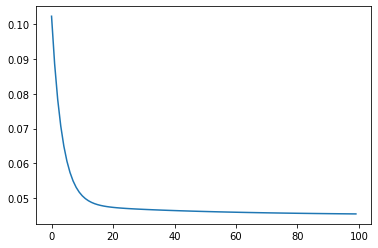

In [32]:
alpha=0.05 ##learning rate
iters=100 ###iterations
lamb=0.1
batch_w,J_his = batch_gradient_descent(X,y,w,alpha,iters,lamb)

plt.plot(range(iters),J_his)
plt.show()

In [33]:
print(batch_w)

[0.22669119 0.03662283 0.07849111 0.03479521 0.06885336 0.04518643]


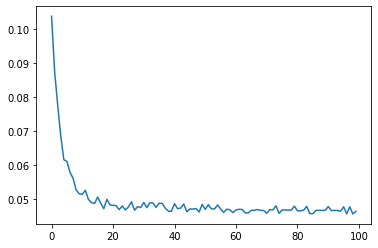

[0.21574807 0.03890069 0.07785604 0.03684963 0.06830221 0.04638632]


In [34]:
batch_size = 50
w= np.zeros(X.shape[1])
mb_w, J_his_mb = MB_gradient_descent(X, y, w, alpha, iters, batch_size, lamb)

plt.plot(range(iters),J_his_mb)
plt.show()

print(mb_w)

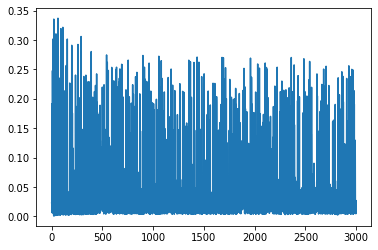

[0.25387544 0.02281601 0.07946705 0.02059821 0.06573094 0.03770932]


In [35]:
w= np.zeros(X.shape[1])
iters = 3000
alpha = 0.01
sg_w, J_his_sg = stochastic_gradient_descent(X,y,w,alpha, iters, lamb)

plt.plot(range(iters),J_his_sg)
plt.show()

print(sg_w)

In [38]:
X_test = data_x_te.values[:, [0, 1]]
m = X_test.shape[0]
# Mapping to a higher dimensional space for Polynomial Regression

X1 = X_test[:,[0]]
X2 = X_test[:,[1]]
X1_Squared = np.square(X1)
X2_Squared = np.square(X2)
X1X2 = np.multiply(X1,X2)

X_test = np.append(X_test, X1_Squared, axis=1)
X_test = np.append(X_test, X2_Squared, axis =1)
X_test = np.append(X_test, X1X2, axis=1)

print(X_test)
xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test-xmin)/(xmax - xmin)

pp = np.ones([m, 1]) # vector containg ones as all elements
X_test = np.append(pp,X_test, axis=1) #Column of ones
#print(X_test)

y_test=data_y_te.values[:,0] #output
ymin = np.min(y_test, axis = 0)
ymax = np.max(y_test, axis = 0)
y_test = (y_test- ymin)/(ymax-ymin) #Normalization
#print(y_test)

y_batch_pred = np.dot(X_test, batch_w)
y_mb_pred = np.dot(X_test, mb_w)
y_sg_pred = np.dot(X_test, sg_w)

#print(y_batch_pred)

[[ 17.4      8.58   302.76    73.6164 149.292 ]
 [ 17.86     9.08   318.9796  82.4464 162.1688]
 [ 18.3      9.58   334.89    91.7764 175.314 ]
 [ 16.97     8.08   287.9809  65.2864 137.1176]
 [ 16.46     7.58   270.9316  57.4564 124.7668]
 [ 17.4      8.58   302.76    73.6164 149.292 ]
 [ 17.85     9.08   318.6225  82.4464 162.078 ]
 [ 18.3      9.58   334.89    91.7764 175.314 ]
 [ 16.9      8.08   285.61    65.2864 136.552 ]
 [ 16.42     7.58   269.6164  57.4564 124.4636]]


In [39]:
def meanSquareError(Y_pred, Y_test):
  mse = np.sum(np.square(Y_pred - Y_test).mean(axis = 0))
  return mse

In [40]:
def meanAbsoluteError(Y_pred, Y_test):
  mae = np.sum(np.abs(Y_pred - Y_test).mean(axis = 0))
  return mae

In [41]:
def CC(Y, _Y):
        diffY = Y - (np.mean(Y, axis=0) * np.ones(Y.shape))
        diff_Y = _Y - (np.mean(_Y, axis=0) * np.ones(_Y.shape))
        
        #print(diffY)
                
        num = np.dot(diffY.transpose(), diff_Y)
        deno = np.sqrt(np.dot(diffY.transpose(), diffY)[0])*np.sqrt(np.dot(diff_Y.transpose(), diff_Y)[0])
        return num/deno

In [42]:
print("Batch: MSE " + str(meanSquareError(y_batch_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_batch_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_batch_pred]).T)[0][0]))
print("MB: MSE " + str(meanSquareError(y_mb_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_mb_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_mb_pred]).T)[0][0]))
print("SG: MSE " + str(meanSquareError(y_sg_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_sg_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_sg_pred]).T)[0][0]))

Batch: MSE 0.2792876443951634 and MAE 0.5005345639573056 CC: -0.0057504967707486965
MB: MSE 0.2821513933070446 and MAE 0.5005640933280817 CC: -0.0059707669737342475
SG: MSE 0.27457293235621955 and MAE 0.5003443856417847 CC: -0.004316328910245603


In [50]:
X_test = data_x_te.values[:, [0, 1]]

X1 = X_test[:,[0]]
X2 = X_test[:,[1]]
X1_Squared = np.square(X1)
X2_Squared = np.square(X2)
X1X2 = np.multiply(X1,X2)

X_test = np.append(X_test, X1_Squared, axis=1)
X_test = np.append(X_test, X2_Squared, axis =1)
X_test = np.append(X_test, X1X2, axis=1)

print(X_test)
xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test-xmin)/(xmax - xmin)

m = X_test.shape[0]

pp = np.ones([m, 1]) # vector containg ones as all elements
X_test = np.append(pp,X_test, axis=1) #Column of ones
#print(X_test)

y_test=data_y_te.values[:,0] #output
ymin = np.min(y_test, axis = 0)
ymax = np.max(y_test, axis = 0)
y_test = (y_test- ymin)/(ymax-ymin) #Normalization
#print(y_test)

def make_pred(w):
  y_pred = np.dot(X_test, w)
  return y_pred
#print(y_batch_pred)

[[ 17.4      8.58   302.76    73.6164 149.292 ]
 [ 17.86     9.08   318.9796  82.4464 162.1688]
 [ 18.3      9.58   334.89    91.7764 175.314 ]
 [ 16.97     8.08   287.9809  65.2864 137.1176]
 [ 16.46     7.58   270.9316  57.4564 124.7668]
 [ 17.4      8.58   302.76    73.6164 149.292 ]
 [ 17.85     9.08   318.6225  82.4464 162.078 ]
 [ 18.3      9.58   334.89    91.7764 175.314 ]
 [ 16.9      8.08   285.61    65.2864 136.552 ]
 [ 16.42     7.58   269.6164  57.4564 124.4636]]


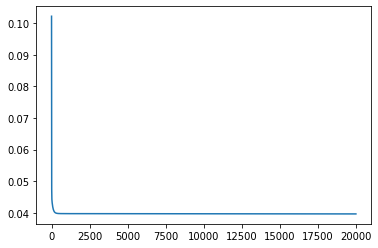

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26050404652215386 and MAE 0.4993285284644071 CC: 0.05180779332763544


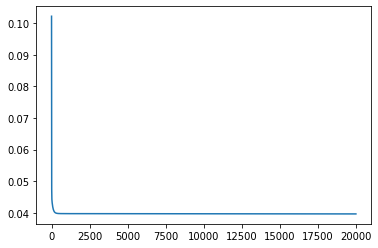

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26050404652215386 and MAE 0.4993285284644071 CC: 0.05180779332763544


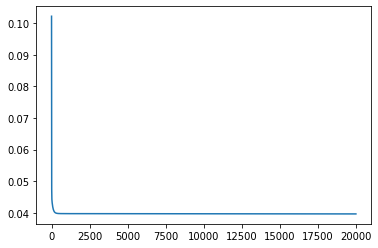

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26050404652215386 and MAE 0.4993285284644071 CC: 0.05180779332763544


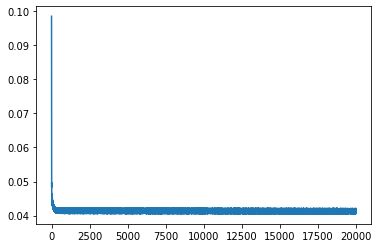

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2633499122355897 and MAE 0.49950844789391313 CC: 0.025384490929626153


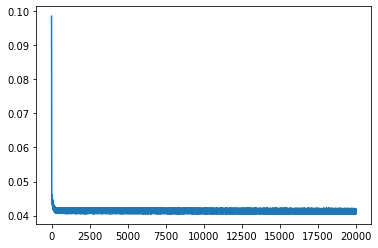

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.264055980653456 and MAE 0.4994954816525321 CC: 0.027865223425649104


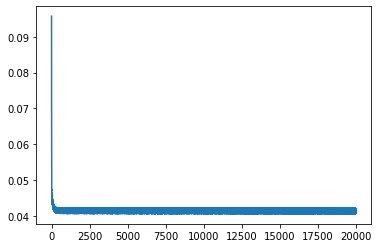

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.26290079216859663 and MAE 0.4995145004461118 CC: 0.023761485526033795


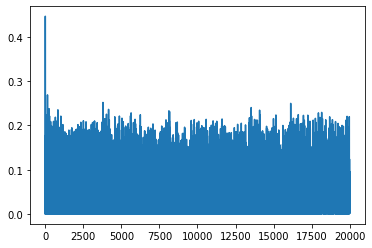

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26018635907578397 and MAE 0.5001856547694262 CC: -0.001882443042150844


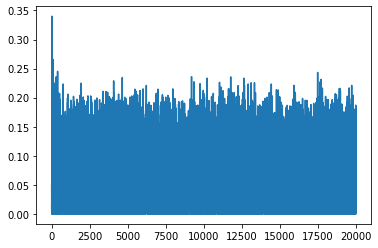

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2639833197181334 and MAE 0.5003078201487192 CC: -0.002886003272287586


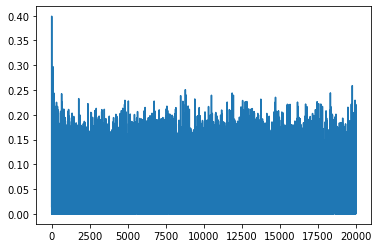

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26987578167127013 and MAE 0.49940068991184383 CC: 0.04733640676130266


In [51]:
# Running all possible combinations

# checking for all combinations of both normals and algos

alpha=0.05 ## learning rate
iters=20000 ## iterations
lamb=0.1 ## regularisation param
batch_size = 50

# X,y,w,alpha, iters, batch_size, lamb, l2 = True

for algorithm in [batch_gradient_descent, MB_gradient_descent, stochastic_gradient_descent]: # three algos
  for j in range(3): # 3 kinds of regularisation
    if j == 0: ## no regularisation
      lamb = 0
      if algorithm == MB_gradient_descent:
        calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb)
      else:
        calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
    elif j == 1: ## l2 reg
      if algorithm == MB_gradient_descent:
        calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = True)
      else:
        calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = True)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
    else:
      if algorithm == MB_gradient_descent:
        calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = False)
      else:
        calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = False)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))


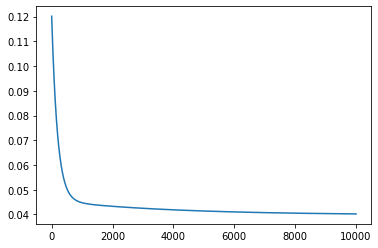

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


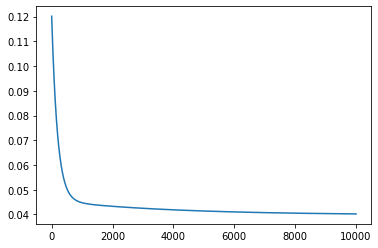

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


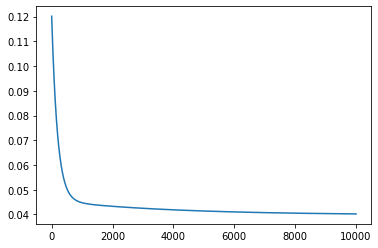

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


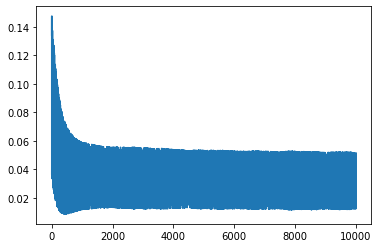

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2776491506671919 and MAE 0.5000597281606758 CC: -0.001179518193184812


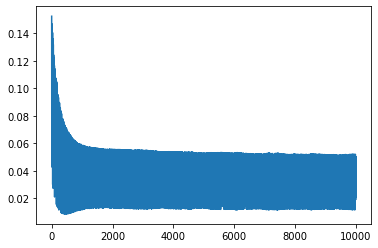

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2785803146849026 and MAE 0.5000479129383354 CC: -0.0009776118490117587


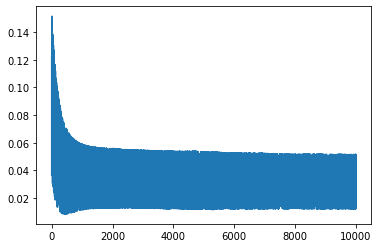

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2780510548150664 and MAE 0.5000547959743535 CC: -0.001100850281460788


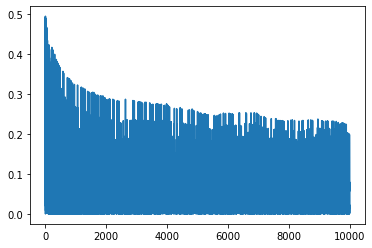

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26579259270090616 and MAE 0.5001145888827934 CC: -0.0018692182012407976


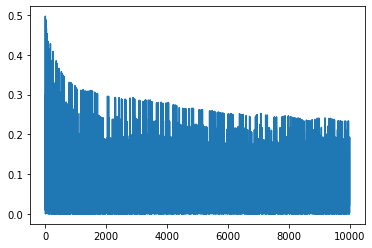

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.27145540501504717 and MAE 0.5000784752860585 CC: -0.001362854281241405


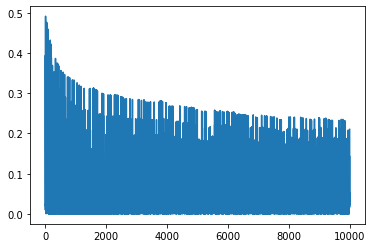

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26981229415188734 and MAE 0.5001543966225446 CC: -0.002384404997098157


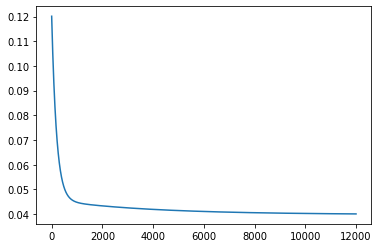

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


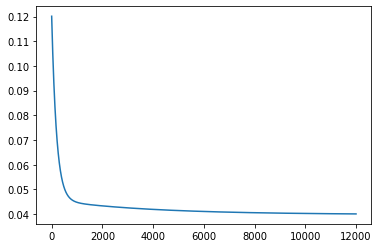

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


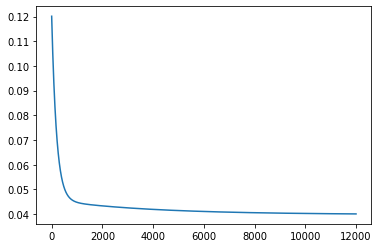

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


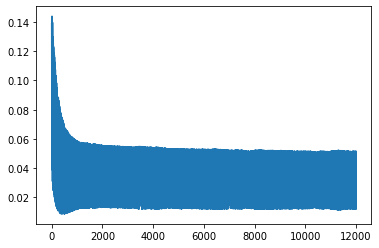

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27700876316611744 and MAE 0.4999663351510494 CC: 0.0007964023467695162


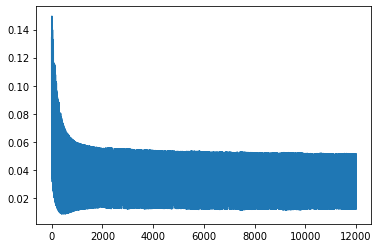

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.276723620574917 and MAE 0.4999701099769688 CC: 0.0006983595703555194


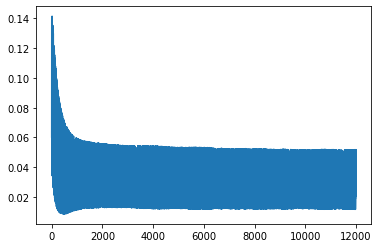

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27730456995514224 and MAE 0.4999628744461589 CC: 0.0008853894612593058


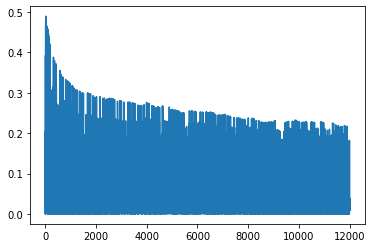

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2676862459248607 and MAE 0.49996884432596544 CC: 0.0006032557150299613


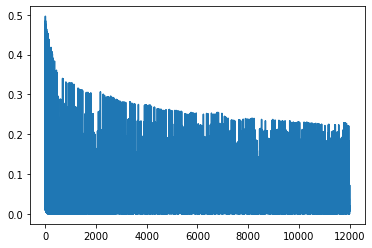

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26953092304255033 and MAE 0.49996430445951734 CC: 0.0007198807918850125


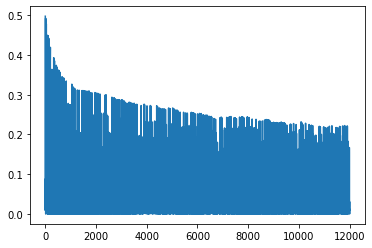

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2673242053859846 and MAE 0.5000252645666621 CC: -0.00046036621289004113


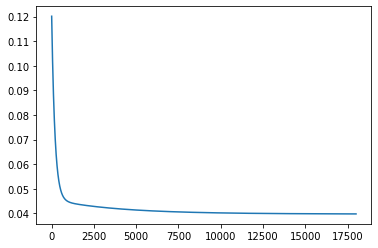

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


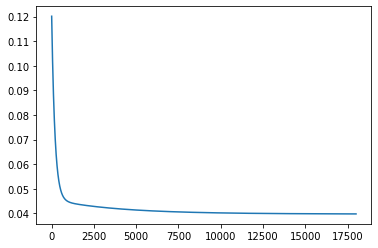

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


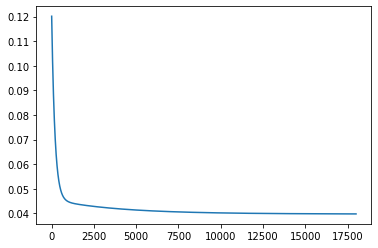

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


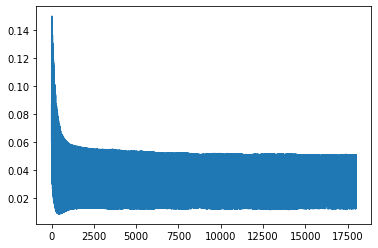

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27442700670244874 and MAE 0.49981750379497764 CC: 0.00614028283515548


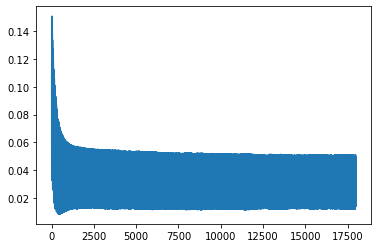

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2747838216370563 and MAE 0.4998132631795514 CC: 0.006350474436840968


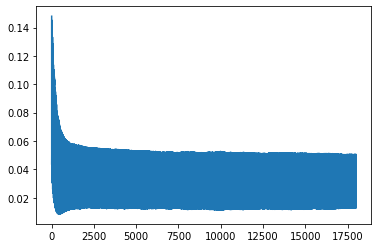

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2733339008192851 and MAE 0.4998318082492258 CC: 0.005286973095247613


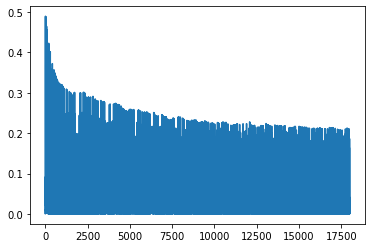

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2670644194312288 and MAE 0.4997406865141878 CC: 0.006783825063602292


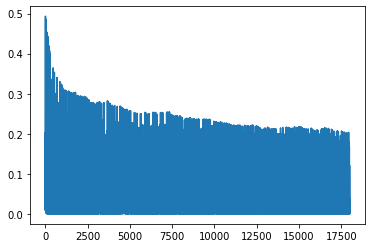

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2641159567352048 and MAE 0.49978527548158036 CC: 0.005450177884650673


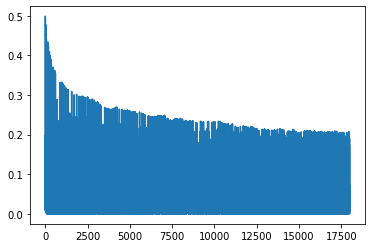

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26786406580132877 and MAE 0.49969455736420826 CC: 0.009990090409511376


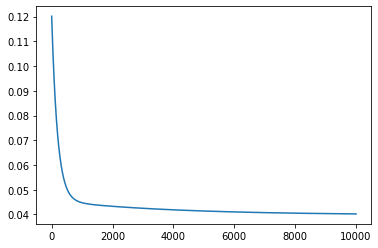

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


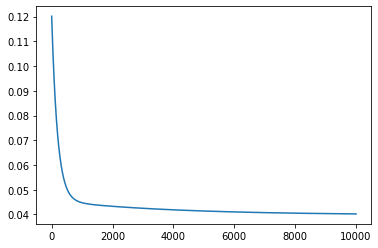

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


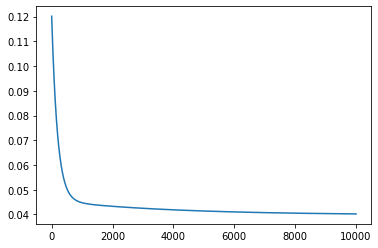

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


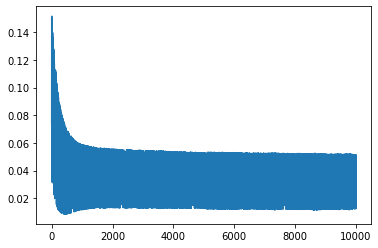

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2772609211740197 and MAE 0.5000635254132971 CC: -0.0012481721876107439


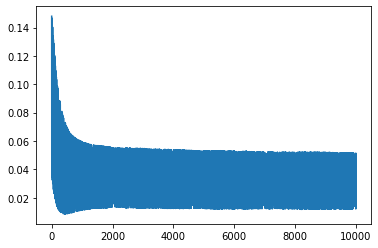

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27739415201321715 and MAE 0.5000614876504169 CC: -0.0012131398861299195


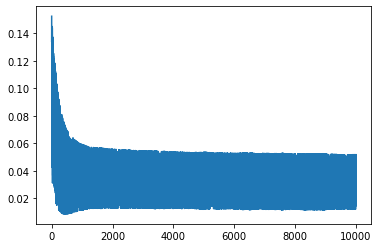

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27816207660520864 and MAE 0.5000557234224858 CC: -0.0011127493602648105


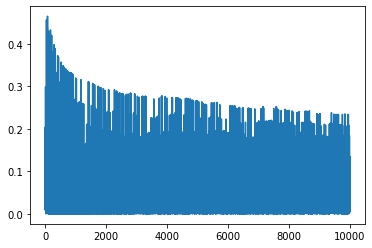

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2688220724306758 and MAE 0.5002303176197064 CC: -0.0031687211289330576


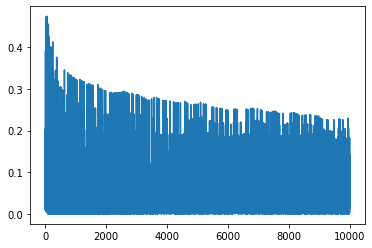

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.268055382656116 and MAE 0.5001436069256917 CC: -0.0021932047935179864


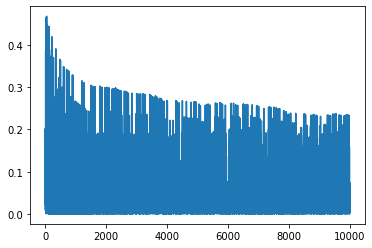

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2712736062164486 and MAE 0.5000658276134234 CC: -0.0011738094545136674


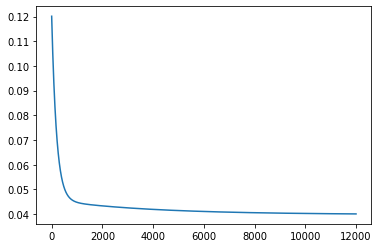

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


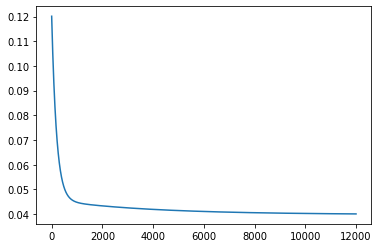

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


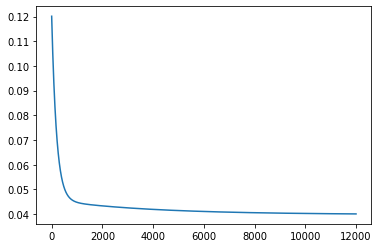

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


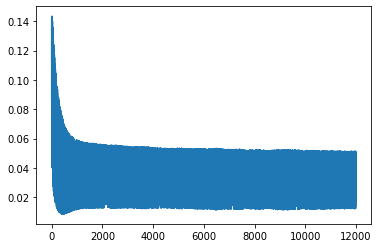

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2759738102129511 and MAE 0.499979596715366 CC: 0.00046468167754097275


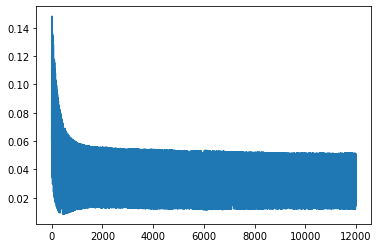

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27617380201307695 and MAE 0.4999769959942353 CC: 0.0005271474097448365


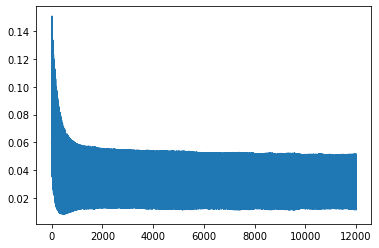

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2775832621677 and MAE 0.4999622080293243 CC: 0.0009060407500229254


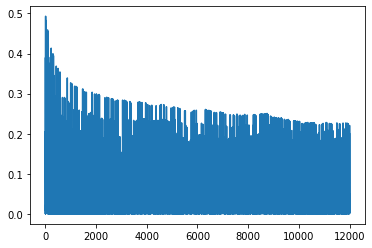

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26661284748242914 and MAE 0.50004919124727 CC: -0.0008750273233689228


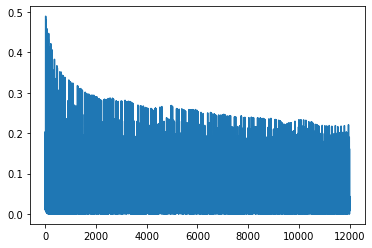

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26858859643245336 and MAE 0.49996238560672046 CC: 0.0007823837338798601


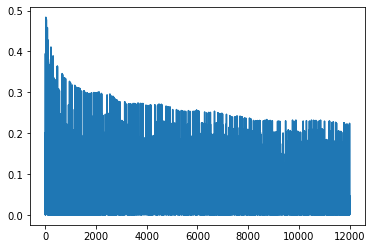

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26689366818650745 and MAE 0.5001006781865516 CC: -0.0014993177996787464


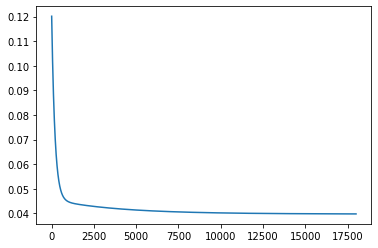

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


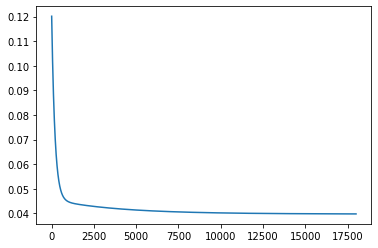

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


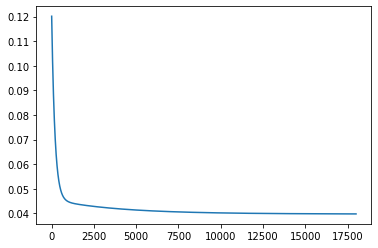

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


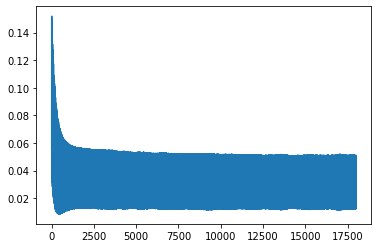

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27471083046800765 and MAE 0.49981380496102445 CC: 0.006285165747144884


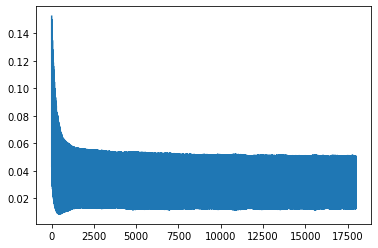

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2738535320855403 and MAE 0.4998265532610187 CC: 0.005587815374712664


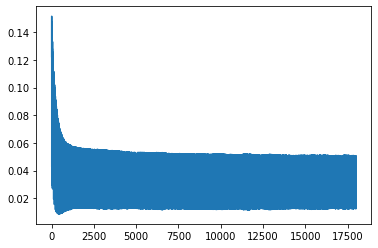

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27389728190118423 and MAE 0.49982530393303765 CC: 0.005687023456724879


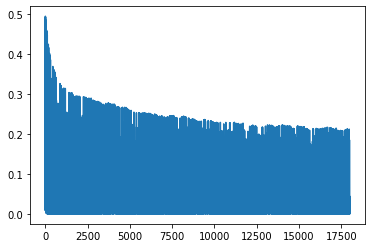

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2668126524532006 and MAE 0.4998338537312367 CC: 0.0038412633838792883


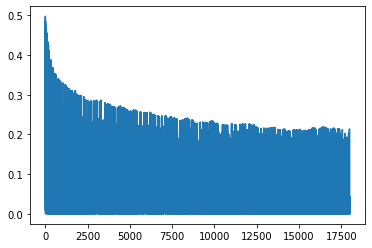

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26697715744904904 and MAE 0.4998432904030065 CC: 0.00355541786832752


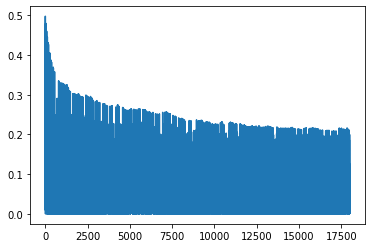

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.267101902380555 and MAE 0.4997932227100284 CC: 0.005254635640644426


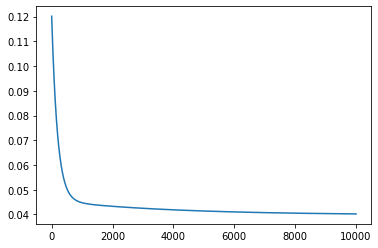

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


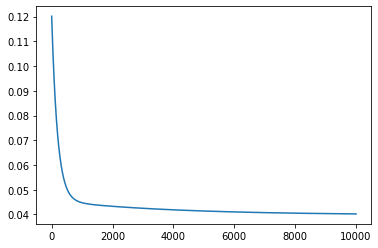

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


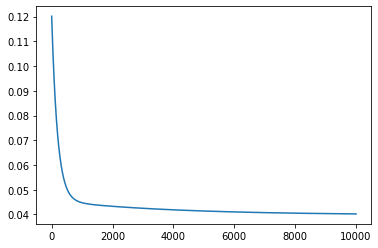

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26649453212321694 and MAE 0.49999762946493737 CC: 4.49539724683807e-05


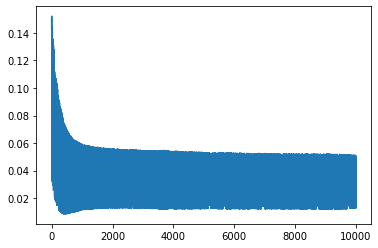

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2760326132730607 and MAE 0.5000749065322669 CC: -0.0014298050462453415


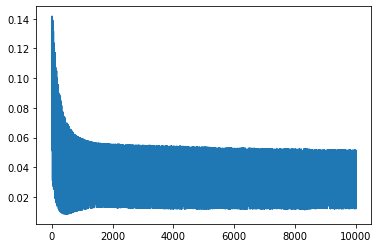

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2775866781424147 and MAE 0.5000613997446868 CC: -0.001209980497896549


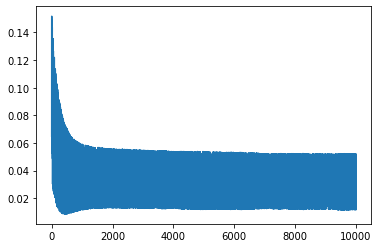

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.278743295007361 and MAE 0.5000496041237948 CC: -0.001008104705512408


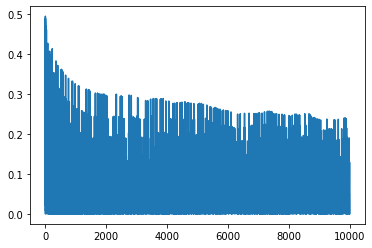

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.27168268014592856 and MAE 0.5001888709210786 CC: -0.002880031780405387


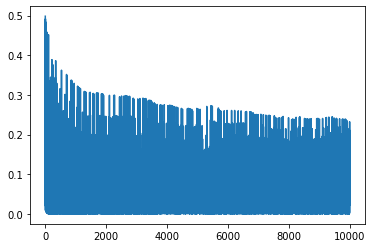

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2700763706552515 and MAE 0.5001139020857783 CC: -0.0019026440132000565


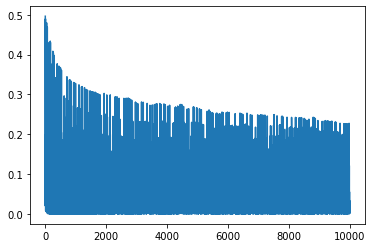

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26832511214733945 and MAE 0.5001461631404392 CC: -0.0023129668852368166


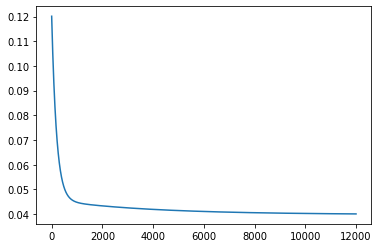

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


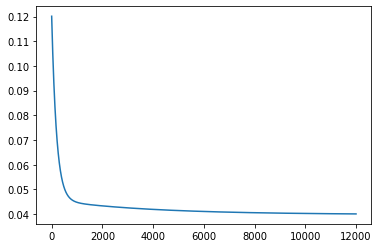

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


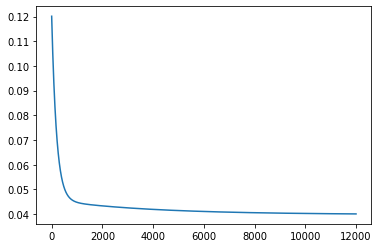

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2651226844533211 and MAE 0.49988100740285546 CC: 0.002674851798346586


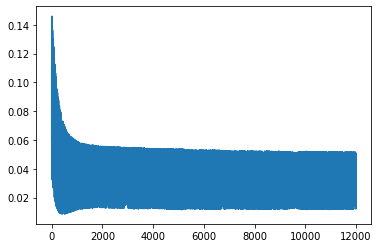

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2767466122334155 and MAE 0.4999686728159355 CC: 0.0007337021671905008


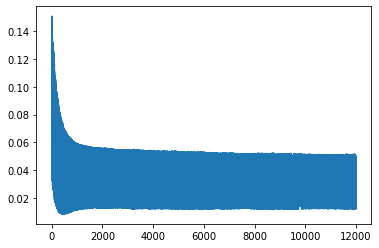

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27637369128176553 and MAE 0.4999759760274832 CC: 0.0005555645467241895


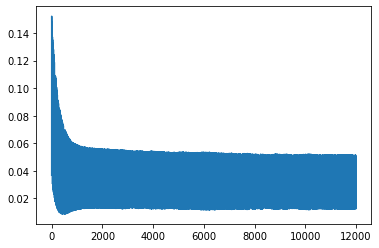

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2759367980094066 and MAE 0.49997941099670024 CC: 0.00046963922646918465


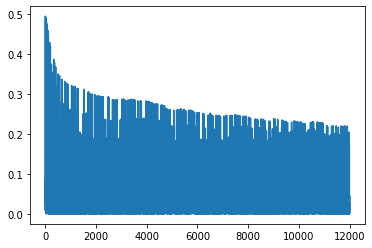

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26883119692677965 and MAE 0.4999625788248121 CC: 0.0007524909270150215


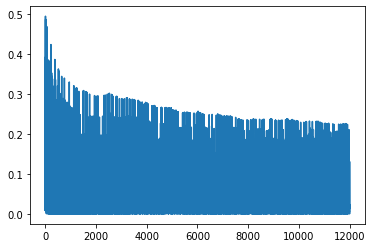

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.27011906249619155 and MAE 0.4999535724771393 CC: 0.0009696267966916028


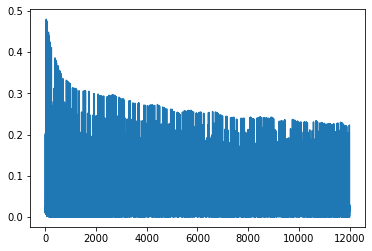

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26883705151773984 and MAE 0.4999621641261851 CC: 0.0007640095004142157


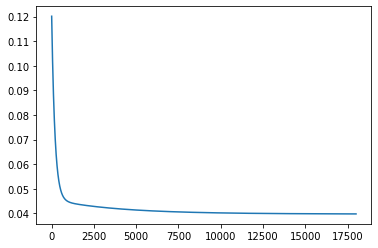

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


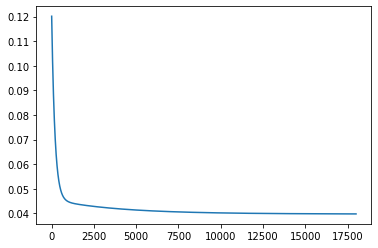

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


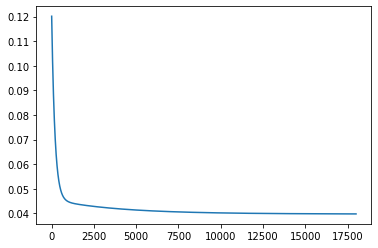

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2630495030529989 and MAE 0.4996470939781899 CC: 0.011881871726651339


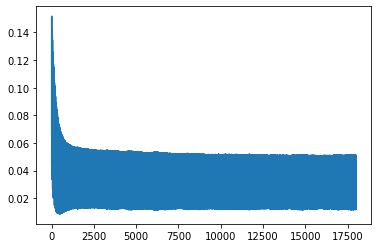

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2755070110575021 and MAE 0.49980822457193524 CC: 0.006657202196567808


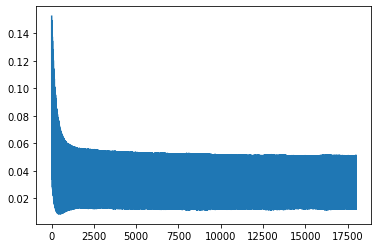

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27487664297297026 and MAE 0.4998146304976954 CC: 0.006242156595713963


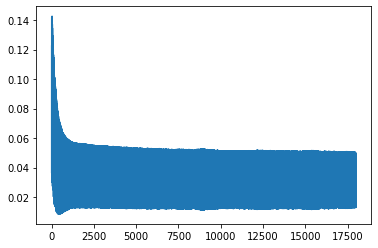

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2725588033471225 and MAE 0.4998398280181055 CC: 0.004903283529682253


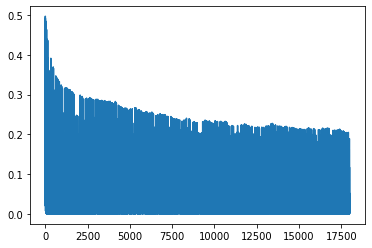

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.262891934651725 and MAE 0.4998451714456353 CC: 0.003238262548701029


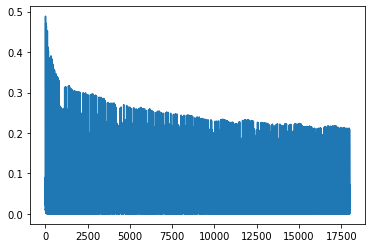

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26682749585032617 and MAE 0.49975745515991365 CC: 0.0065620671050838795


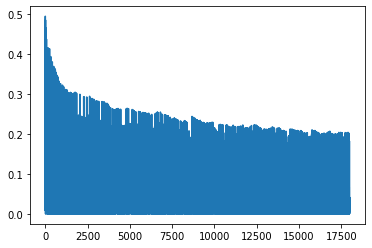

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2653234087960764 and MAE 0.4996963446951363 CC: 0.009104828016300439


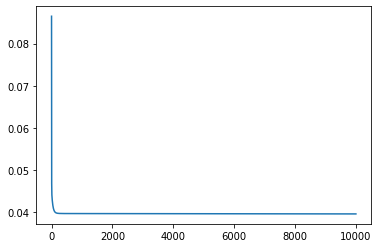

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


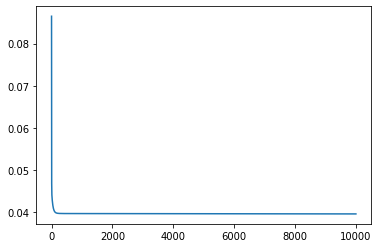

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


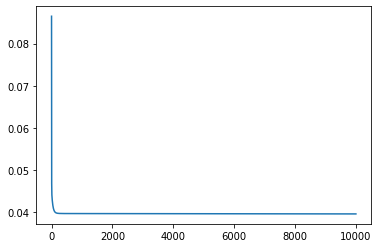

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


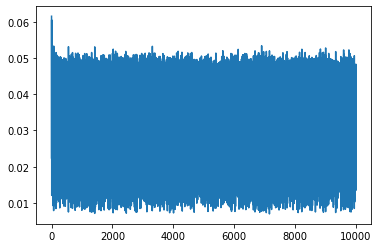

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2707582565682888 and MAE 0.4997712687535441 CC: 0.008029123817905477


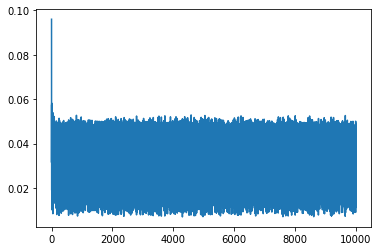

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2743629157329256 and MAE 0.4997333854765362 CC: 0.011278241460543565


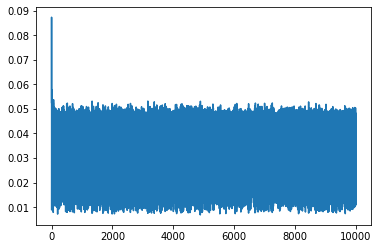

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27882961445396753 and MAE 0.4996911172584116 CC: 0.016169622169391402


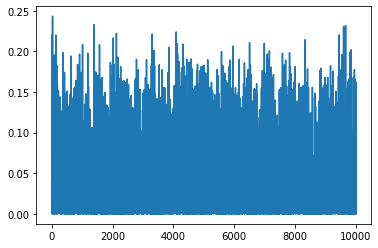

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2564894502255717 and MAE 0.4999414971771893 CC: 0.000736837560760015


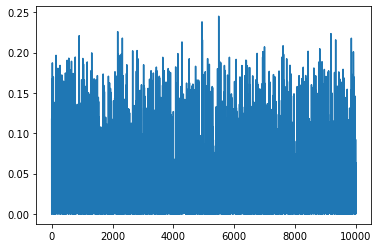

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2645621071545276 and MAE 0.5004065764541836 CC: -0.003572146452493944


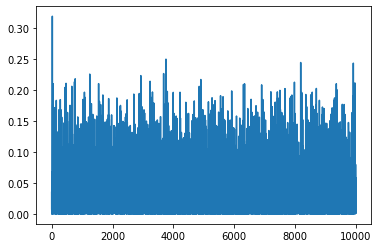

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26251995177225307 and MAE 0.49954592802843256 CC: 0.006405440555006708


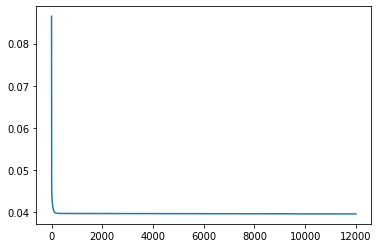

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


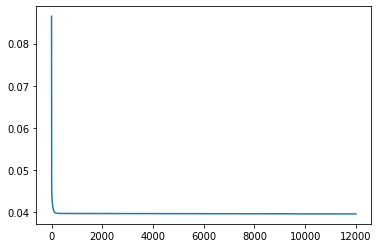

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


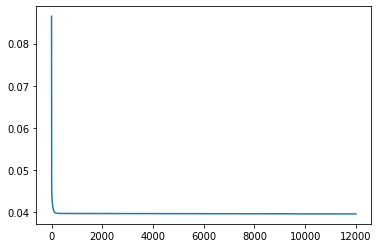

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


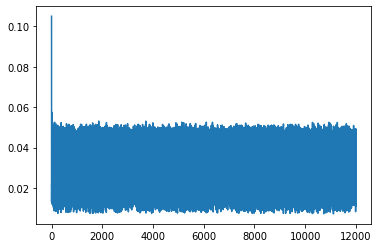

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2891021912232828 and MAE 0.4995848042125898 CC: 0.10011116042025751


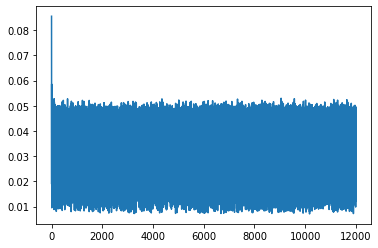

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.266444671158765 and MAE 0.4998342032895917 CC: 0.004234367931036154


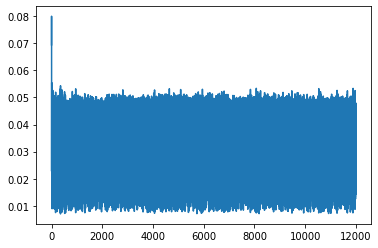

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27151710928635503 and MAE 0.49974579027701616 CC: 0.010702857071186065


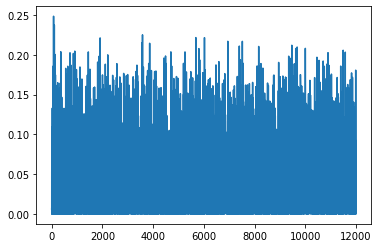

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.3114226695098471 and MAE 0.49879763826248513 CC: 0.016249147390886825


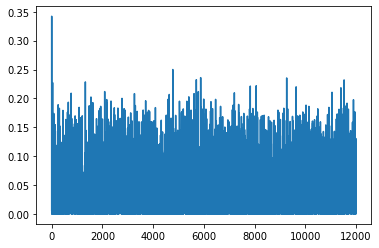

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.277797355041696 and MAE 0.49906196539506276 CC: 0.054161881321105214


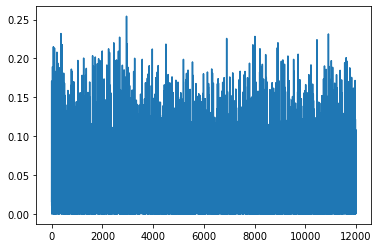

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.25372447065788944 and MAE 0.49970781358275335 CC: 0.0047050894796140195


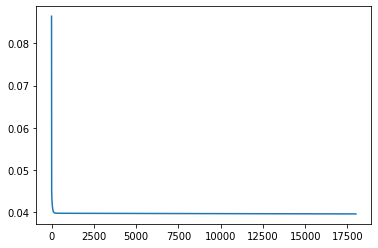

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


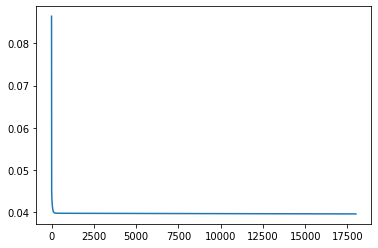

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


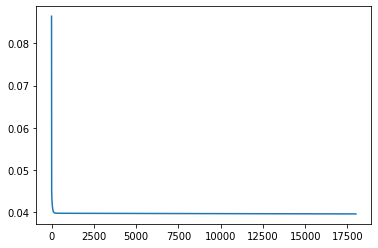

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


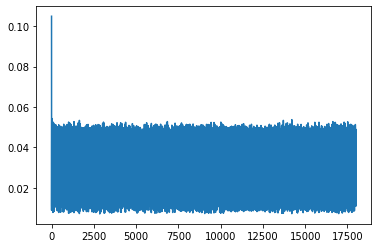

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2721319652080103 and MAE 0.4997617993834744 CC: 0.00797740935125501


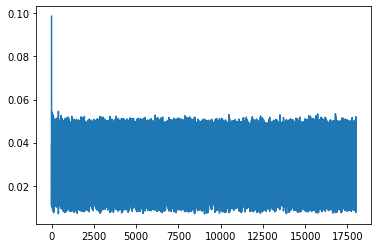

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.28484052578695057 and MAE 0.49966237834398547 CC: 0.021882073061643362


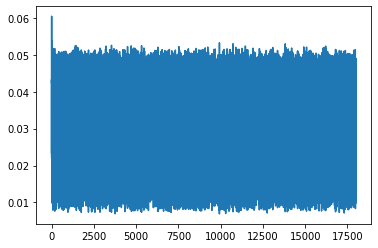

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2758868875021916 and MAE 0.49973733054796077 CC: 0.009812581562581508


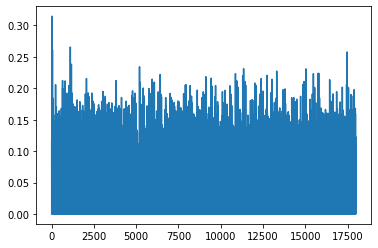

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26170856425116956 and MAE 0.4990217449032608 CC: 0.05116897432520141


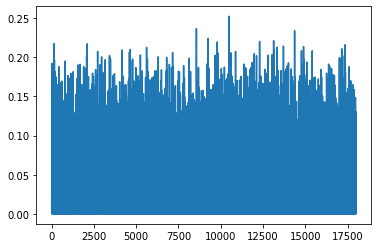

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.24982049308800258 and MAE 0.4989999832432058 CC: 0.06890650795699989


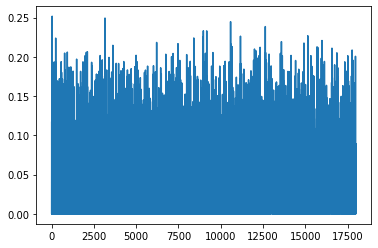

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.30706690267858694 and MAE 0.4993316093241106 CC: 0.05668062399016754


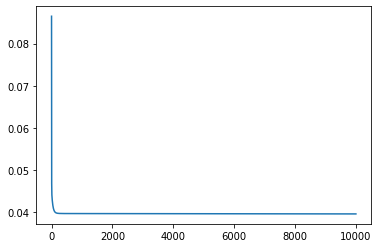

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


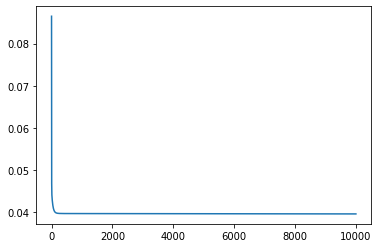

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


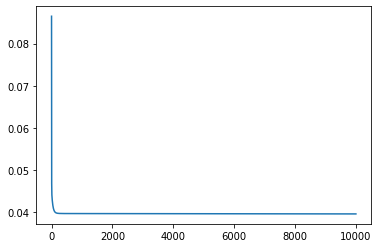

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


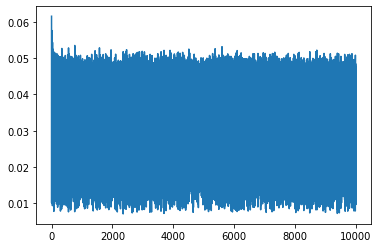

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2779980648138523 and MAE 0.4996796925719719 CC: 0.021123683721547777


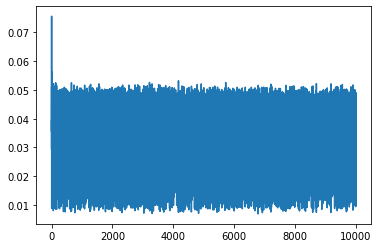

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2689537374493494 and MAE 0.49979972419582885 CC: 0.0063178298815073685


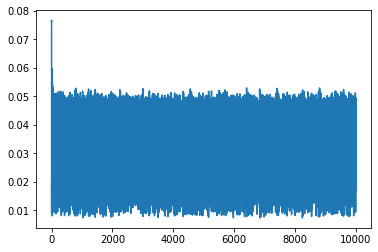

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2672598708706314 and MAE 0.49981394586813205 CC: 0.005232198953669579


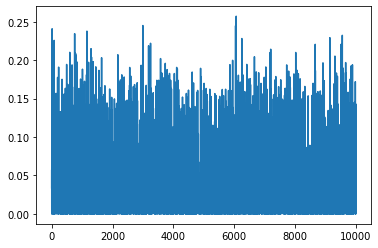

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.28549276001445556 and MAE 0.4985830573210327 CC: 0.023863092995946134


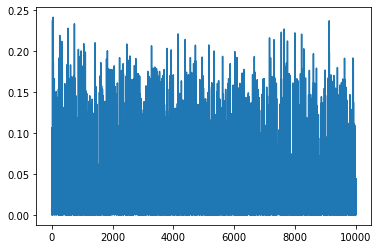

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.28135976102292154 and MAE 0.499926425400777 CC: 0.0017052658686464207


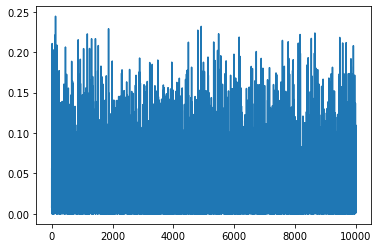

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.29604369566093036 and MAE 0.49874850636084866 CC: 0.02324313918312388


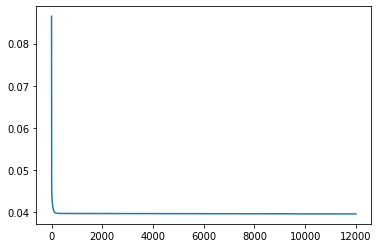

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


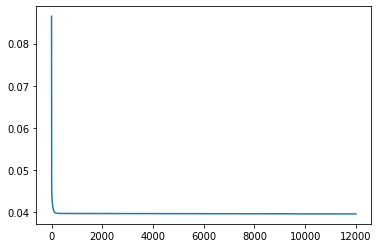

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


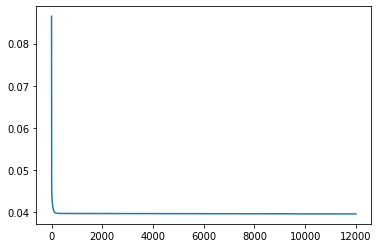

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


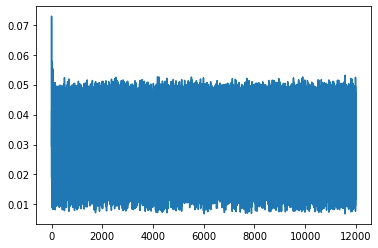

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27797092570249454 and MAE 0.4997081564714313 CC: 0.014593851162968902


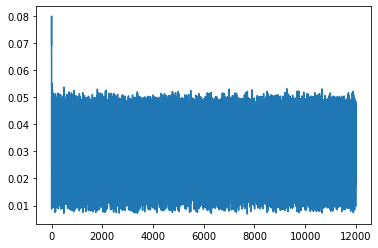

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2674388768639179 and MAE 0.49980761887599917 CC: 0.005610518350565319


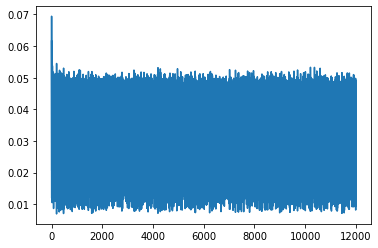

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.28029256811368247 and MAE 0.49964474566912376 CC: 0.031478206014030286


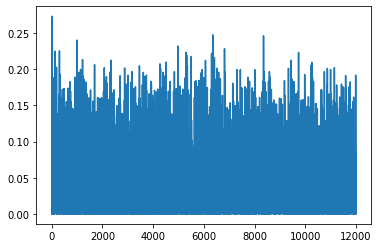

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.27260402526504873 and MAE 0.49935656887981583 CC: 0.021700901358522793


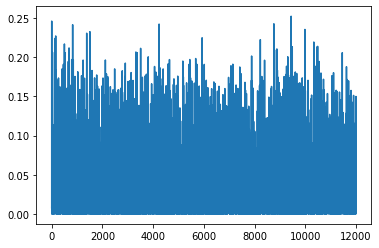

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2583889647862055 and MAE 0.49910002076530297 CC: 0.05017420717642888


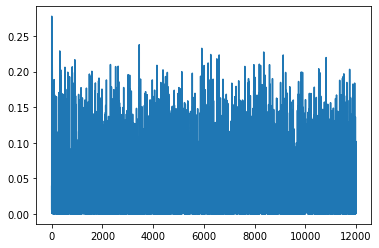

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.27169415315261636 and MAE 0.49961737130716155 CC: 0.15806370416001148


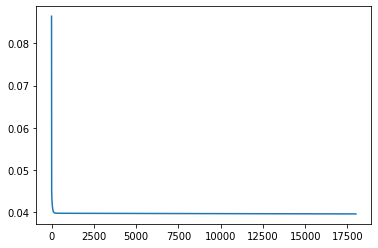

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


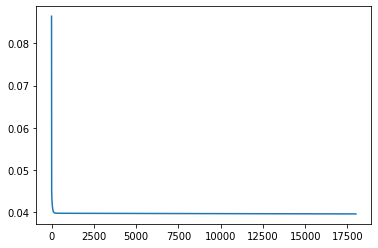

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


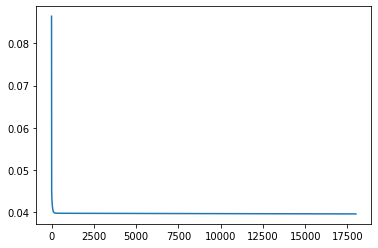

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


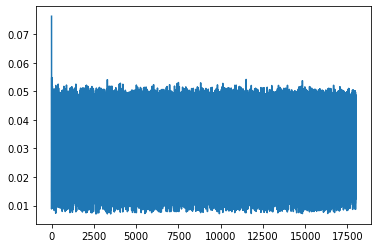

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27578021037564804 and MAE 0.4997572025558286 CC: 0.010018082925434574


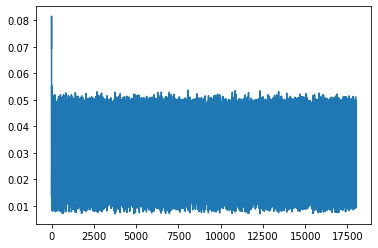

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.26662828323394694 and MAE 0.49985083419991544 CC: 0.004312993290295646


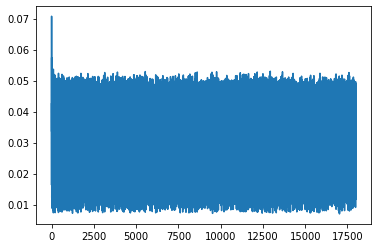

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27205255514989113 and MAE 0.49976805611391245 CC: 0.008105451535504814


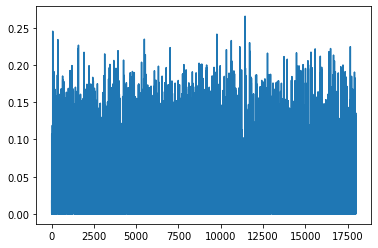

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2538297094148948 and MAE 0.4995785379373405 CC: 0.007360328736175378


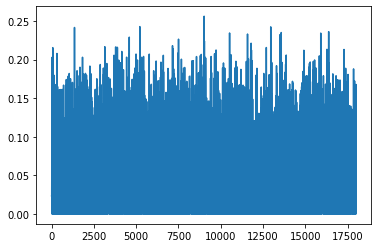

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.253964149555597 and MAE 0.4996856791692908 CC: 0.004805725007589822


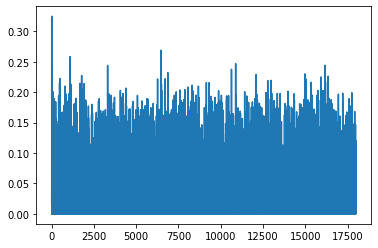

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.260237728467923 and MAE 0.4999281592067182 CC: 0.0009132825873959396


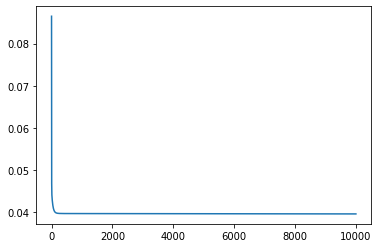

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


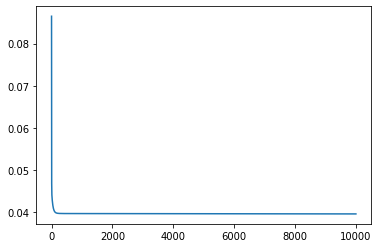

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


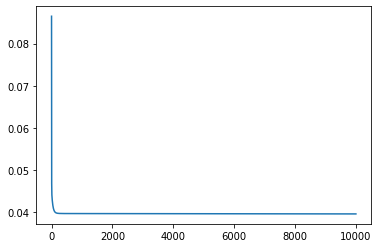

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.260504046347048 and MAE 0.4993285285282048 CC: 0.05180779511321866


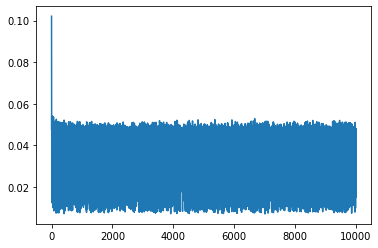

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2691113003097312 and MAE 0.4997590433449563 CC: 0.008077576319099071


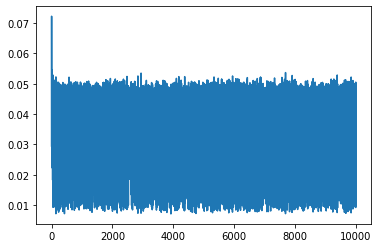

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2689762540362312 and MAE 0.4997597091398707 CC: 0.008318769850946008


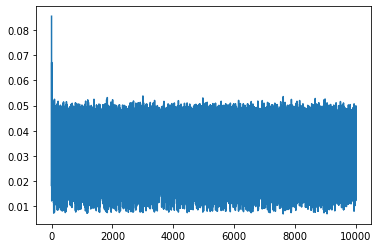

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2741944674978308 and MAE 0.4997077753579471 CC: 0.016905340092303833


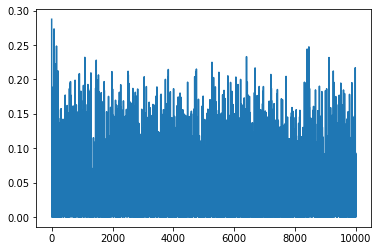

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2607140171484011 and MAE 0.4996654241238125 CC: 0.0035090167673127266


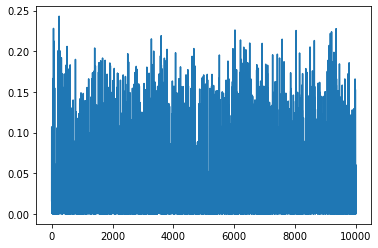

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2630408448334329 and MAE 0.4998414324485873 CC: 0.0015627630024565768


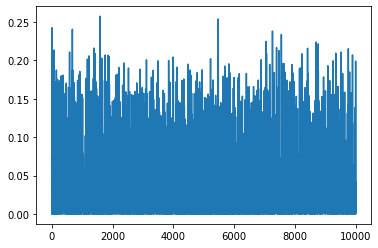

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2948892579470658 and MAE 0.4995471097065464 CC: 0.024184858071011926


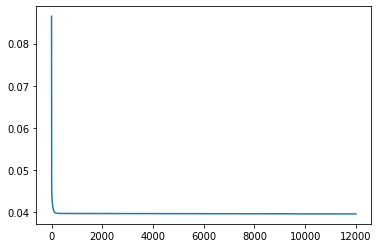

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


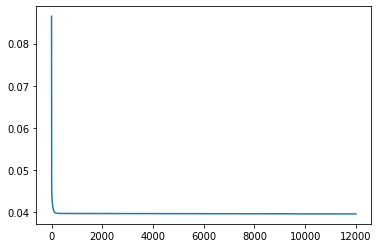

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


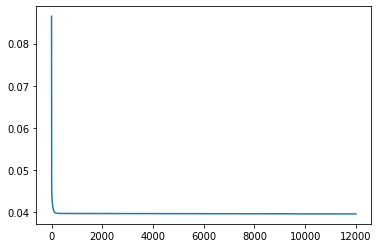

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.26021747990736155 and MAE 0.49933833614729045 CC: 0.05575566072409073


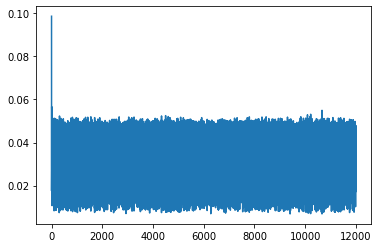

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2699084570684893 and MAE 0.49978148768104863 CC: 0.00765054116854528


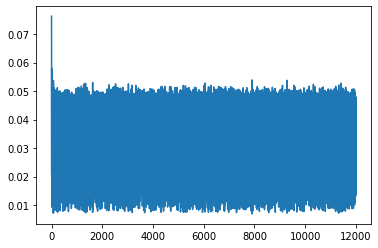

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.26349413773035846 and MAE 0.49987103880407613 CC: 0.003206328978997031


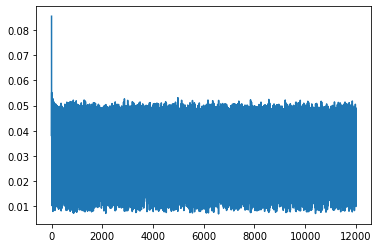

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2871979596782281 and MAE 0.4995923512653297 CC: 0.04841046708899912


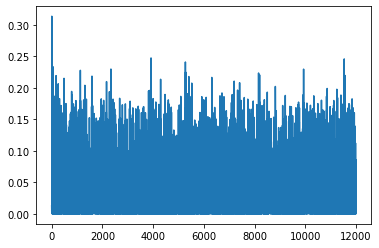

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2671872873554121 and MAE 0.5001135621190453 CC: -0.0010445307290998698


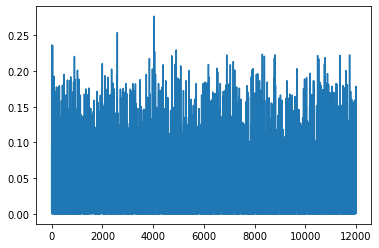

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26066309166721613 and MAE 0.500265744161049 CC: -0.0026589584221644986


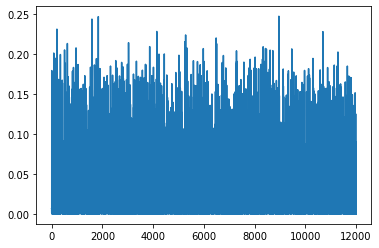

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26368807845036324 and MAE 0.4994827800072093 CC: 0.04463581204049995


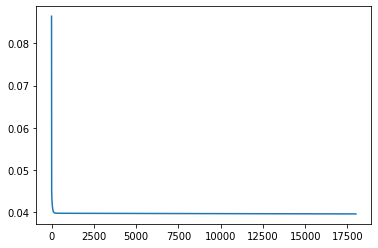

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


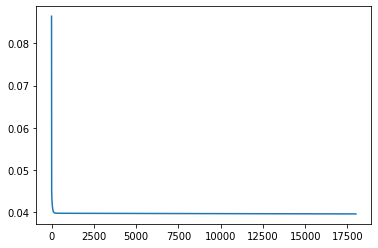

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


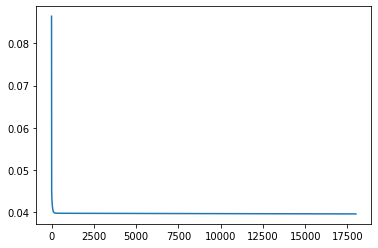

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2593953743364632 and MAE 0.4993671597491649 CC: 0.07272753139598451


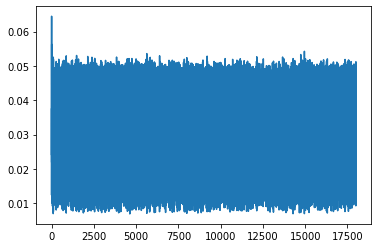

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27726547205623575 and MAE 0.4997136727805193 CC: 0.012850323426123167


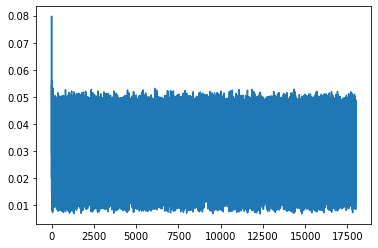

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.270337590839695 and MAE 0.4998201162781658 CC: 0.005233900233805336


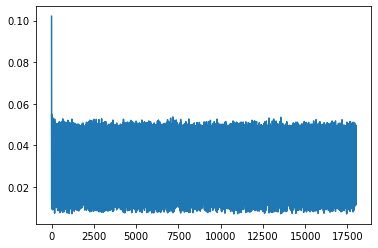

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27714450740191365 and MAE 0.49972350325550174 CC: 0.012425044711888641


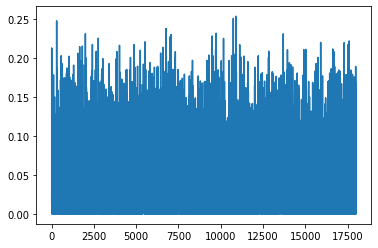

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.3049282842246056 and MAE 0.4991741097252621 CC: 0.015234779215370479


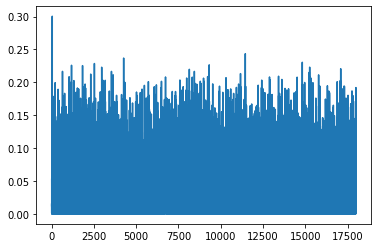

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2599691834329166 and MAE 0.49989279279342363 CC: 0.0025119082402506932


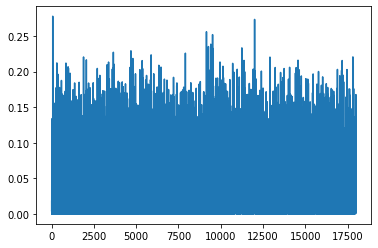

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2792069572600159 and MAE 0.5003198117625949 CC: -0.0032689884179824408


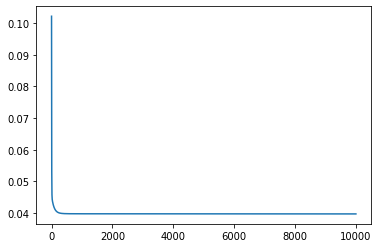

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


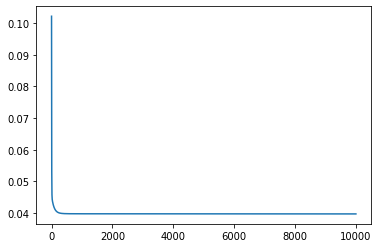

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


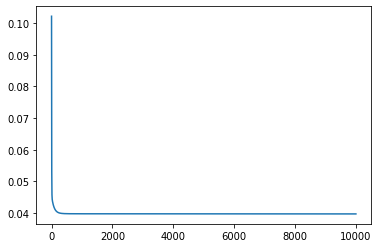

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


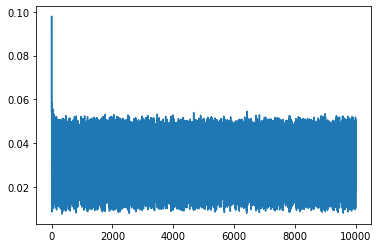

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2717126129660758 and MAE 0.4997418017654992 CC: 0.009491780717267995


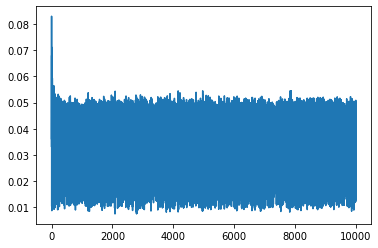

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27484277895371695 and MAE 0.4997054172836969 CC: 0.013772683377609172


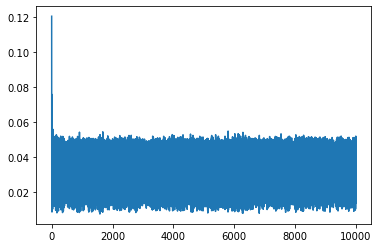

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2736249342957987 and MAE 0.4997212814378587 CC: 0.012634871695667571


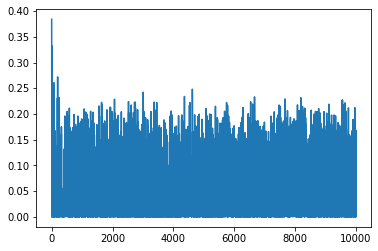

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26505569892870684 and MAE 0.4994912635557272 CC: 0.028601574879857653


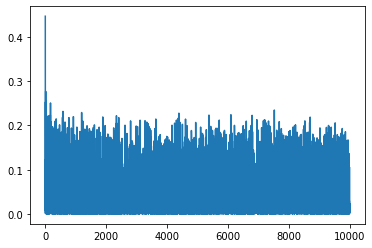

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2752160644359433 and MAE 0.4994278150624087 CC: 0.02761873285857734


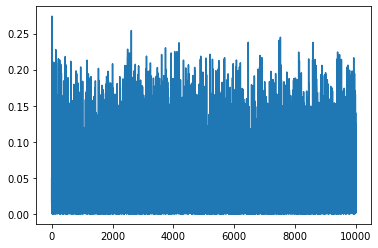

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2597214026290665 and MAE 0.4993839054924843 CC: 0.590118059603028


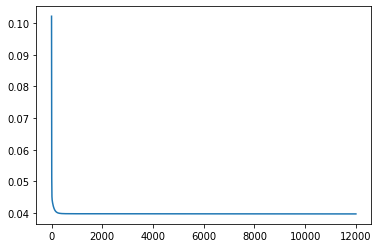

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


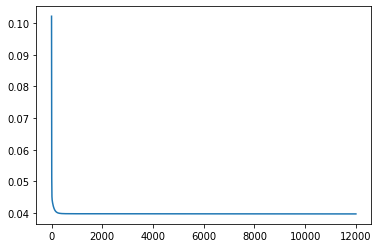

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


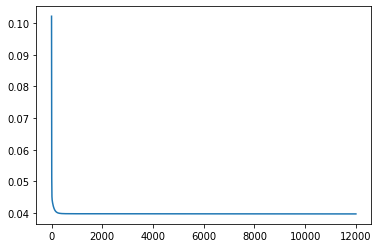

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


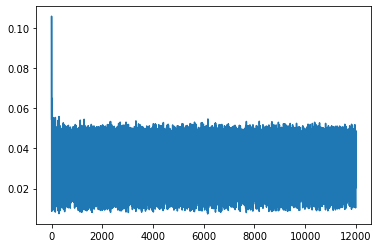

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2688008220167566 and MAE 0.4997906745535782 CC: 0.006944659601896628


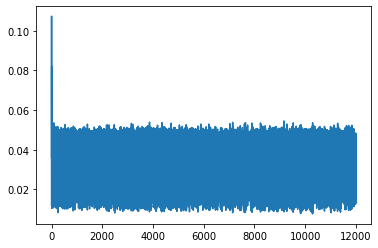

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27474510653415696 and MAE 0.49968893998015707 CC: 0.01818660598611831


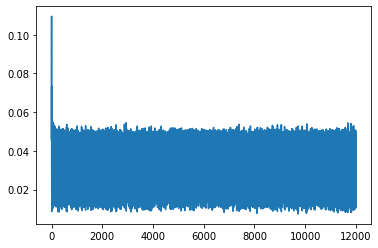

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27863199549182344 and MAE 0.4996615902649048 CC: 0.019226249255342925


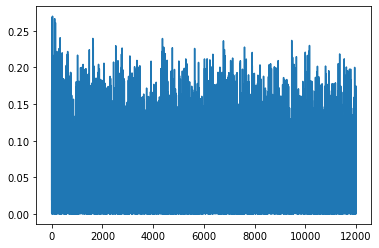

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2579535400281021 and MAE 0.49993806999050855 CC: 0.000695744738691308


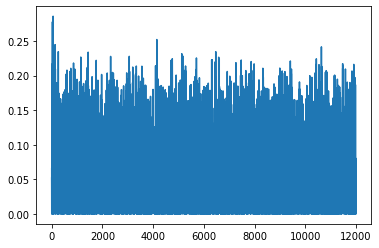

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.28419993492999424 and MAE 0.49934053643829585 CC: 0.5615955338450459


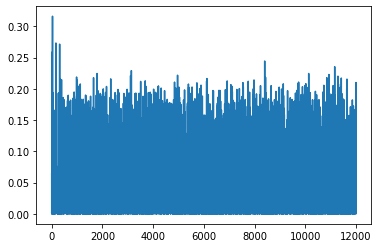

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.27959235424598267 and MAE 0.4987199961252827 CC: 0.054679772300851553


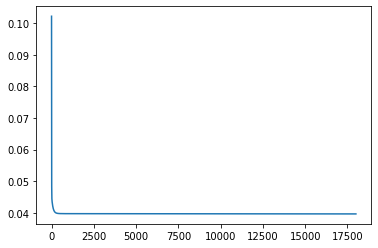

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


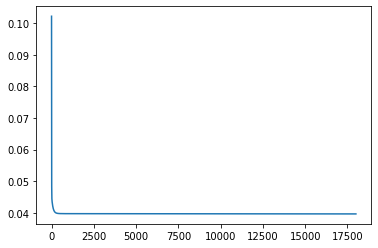

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


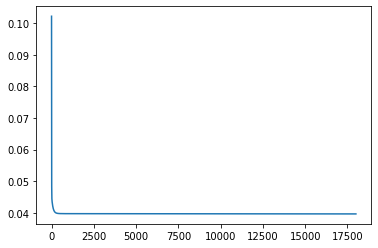

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


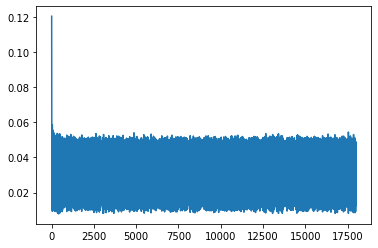

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2839803039079455 and MAE 0.49960475221593903 CC: 0.047684737002089056


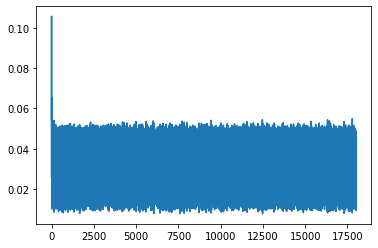

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.28589412023390837 and MAE 0.4995962705059759 CC: 0.04751940535420138


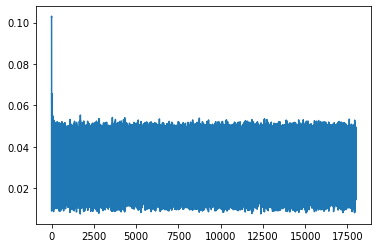

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27100177755282984 and MAE 0.4997572462472049 CC: 0.008585873168882503


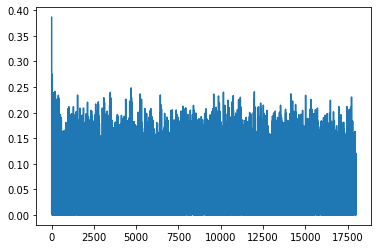

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2766044361555058 and MAE 0.49987988680004813 CC: 0.0026593830189256336


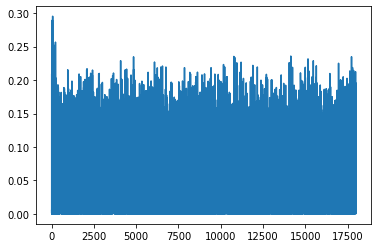

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.27972065810154606 and MAE 0.49896165376240476 CC: 0.04390516866894177


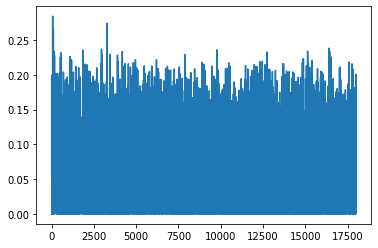

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.25933879513537983 and MAE 0.500041729299108 CC: -0.0005945193411907921


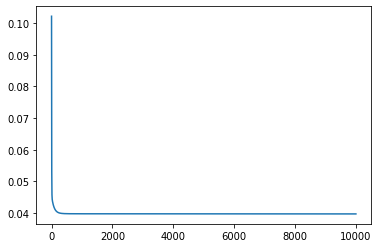

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


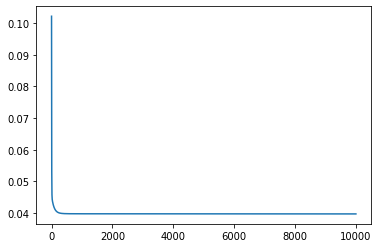

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


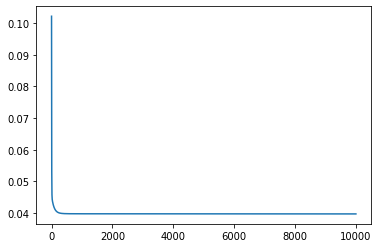

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


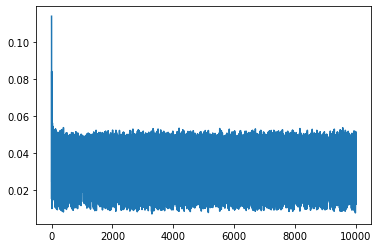

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.27337591966527863 and MAE 0.4997076302121273 CC: 0.012519023967412609


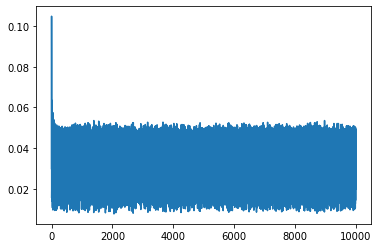

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2669998682138366 and MAE 0.4997689347671024 CC: 0.008018650485580427


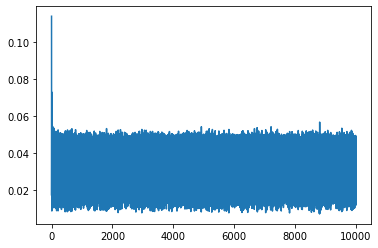

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2721121552964905 and MAE 0.4997315392192053 CC: 0.011797151087856146


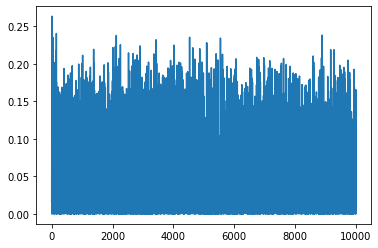

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2647940513745377 and MAE 0.4995612546710159 CC: 0.014214537511943525


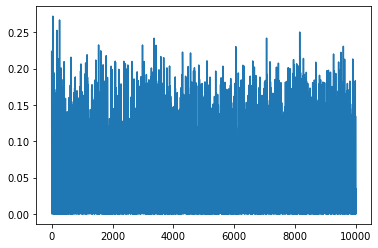

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.28450886976306167 and MAE 0.4990023389108611 CC: 0.3686062471706971


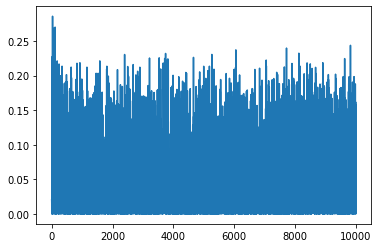

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.25248518113975194 and MAE 0.49961942999233255 CC: 0.007161013632003046


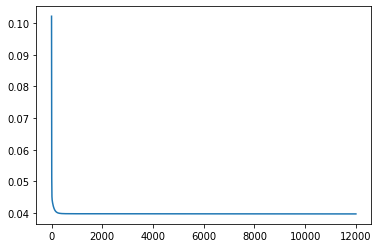

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


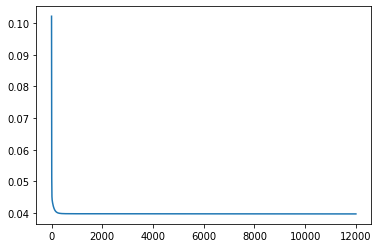

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


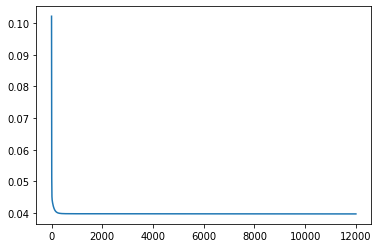

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


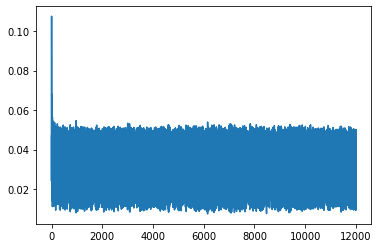

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.26855975855372705 and MAE 0.4997760352923204 CC: 0.007622750306831632


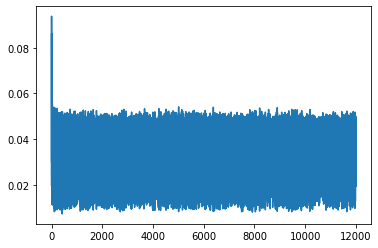

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.266064522158497 and MAE 0.4998165504545315 CC: 0.005660528324033765


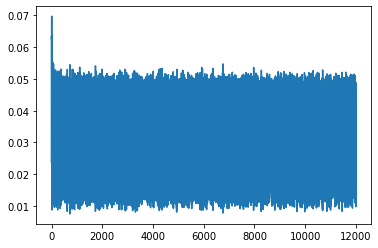

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.28435015479789433 and MAE 0.49959320729442924 CC: 0.05513287879165795


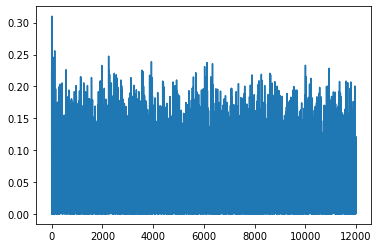

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.27770575277189224 and MAE 0.4993464639359121 CC: 0.05159048271748648


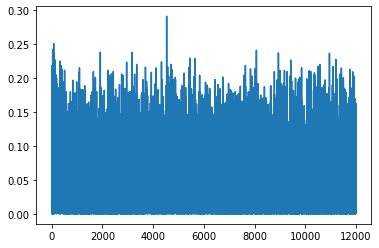

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26565191211923134 and MAE 0.49976851779548825 CC: 0.0061827593215643475


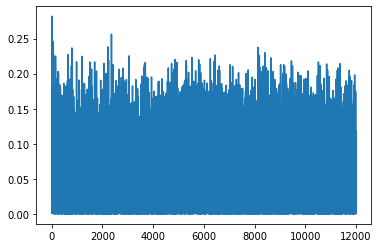

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2721512045443532 and MAE 0.49951816304199265 CC: 0.01525432912582305


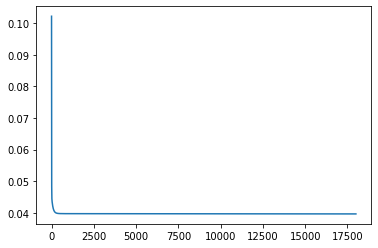

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


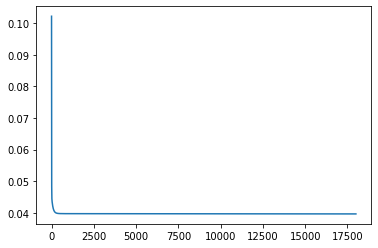

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


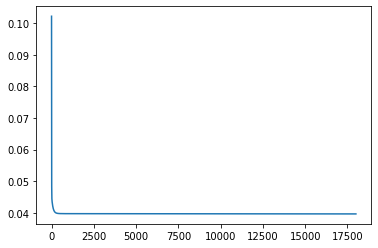

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


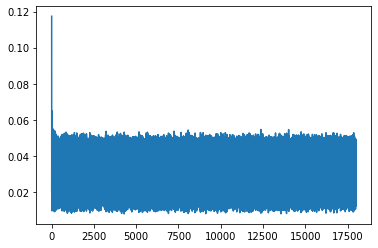

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2712701823012398 and MAE 0.49974648646264264 CC: 0.009278138505838827


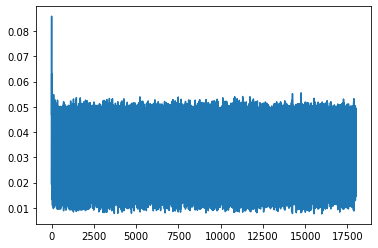

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.26743157019010944 and MAE 0.4997929132890292 CC: 0.0068941516174420535


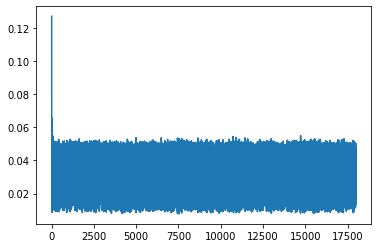

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2775562351434611 and MAE 0.49967744322228186 CC: 0.019402050140291765


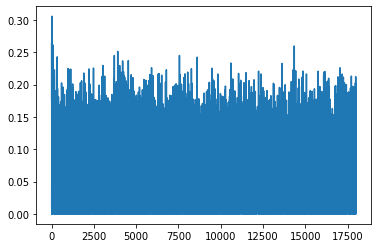

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2551679471987249 and MAE 0.4996795225073295 CC: 0.007578474067951098


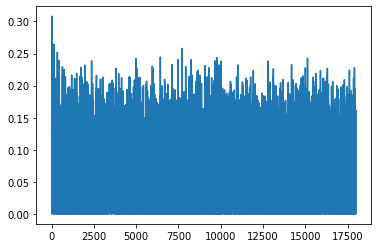

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.26870491439833444 and MAE 0.5004297408266558 CC: -0.003608198272967241


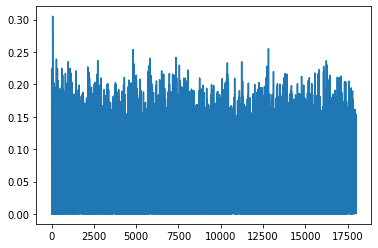

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2673244076490482 and MAE 0.49957444546794694 CC: 0.01913503262540751


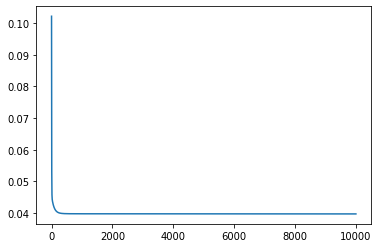

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


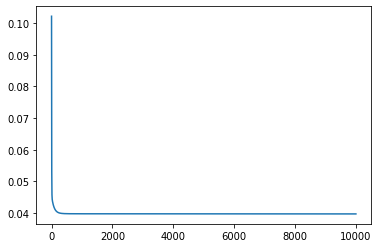

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


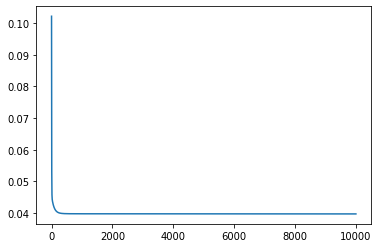

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2612481870472282 and MAE 0.49930355990212344 CC: 0.04421850309097018


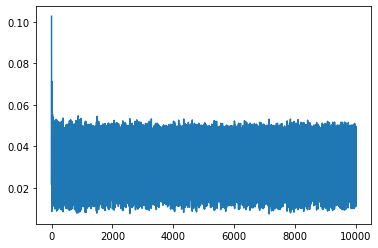

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2690575198155158 and MAE 0.4997616759204254 CC: 0.008327814783342779


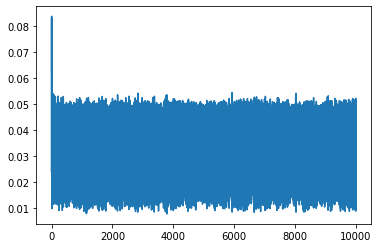

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2838002610573522 and MAE 0.49960503431261616 CC: 0.03343968525508367


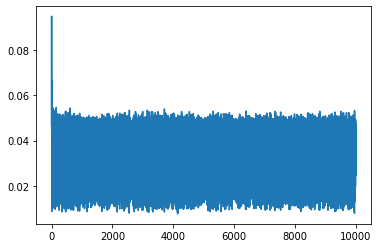

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2706009706567596 and MAE 0.49974168288485804 CC: 0.009952537925364642


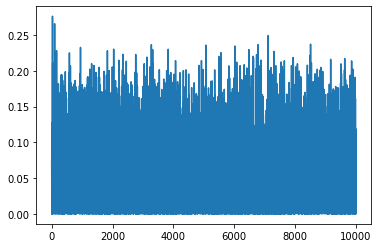

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.28161525608028404 and MAE 0.4992571829229833 CC: 0.05061736788797444


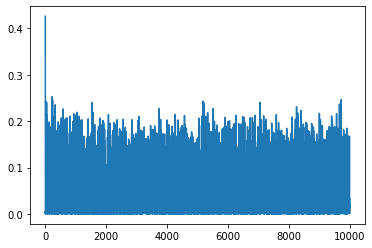

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2694253647584048 and MAE 0.4999676880339113 CC: 0.0005778486150258657


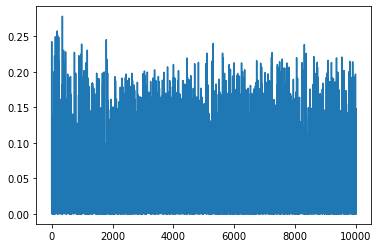

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.25534888550060403 and MAE 0.4993073593806058 CC: 0.0559572193443255


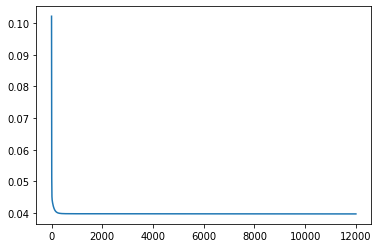

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


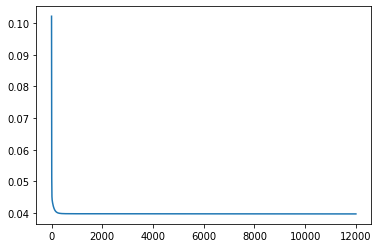

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


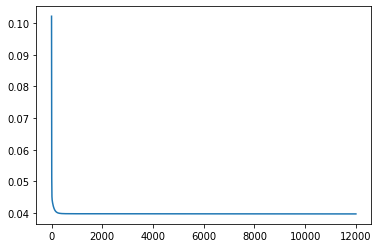

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2610961740180387 and MAE 0.4993086056687227 CC: 0.045526229852050765


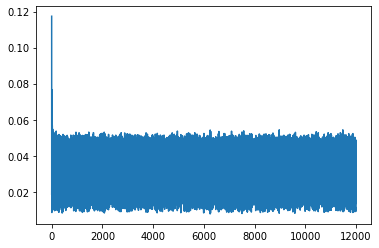

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2666481168184624 and MAE 0.4997861341150046 CC: 0.006506482158496292


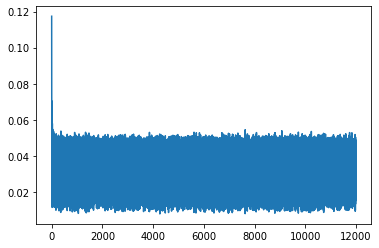

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2733934947895157 and MAE 0.4996988115165758 CC: 0.014946398945384598


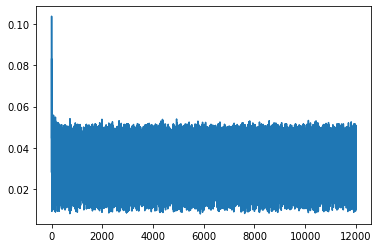

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2771376180272739 and MAE 0.49968306172577925 CC: 0.01696565864474513


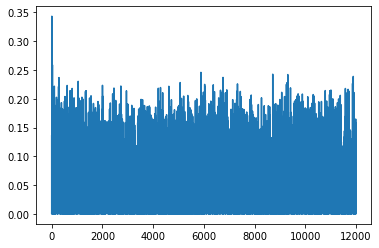

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2678977670270799 and MAE 0.4996409980018641 CC: 0.009992215563049647


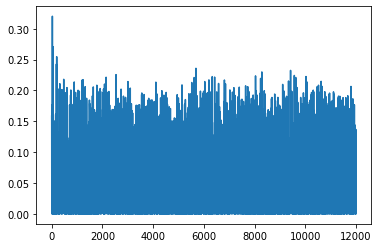

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2939649385548725 and MAE 0.49875985495282277 CC: 0.025311182019276433


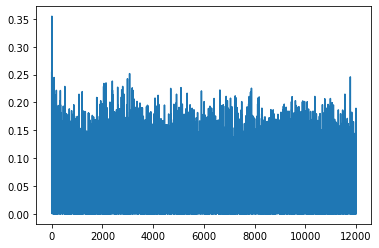

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2639891533716622 and MAE 0.49951535540317743 CC: 0.0158849415696385


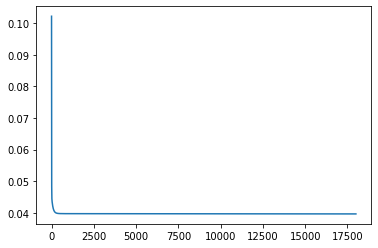

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


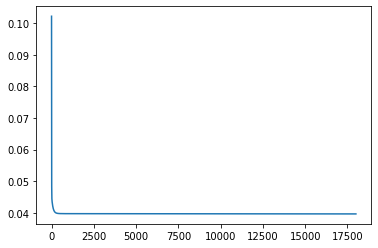

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


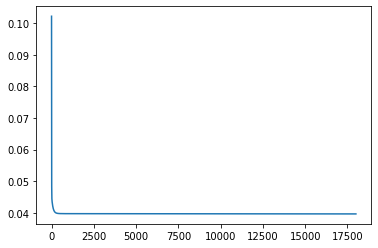

Batch: <function batch_gradient_descent at 0x7f91306c5b00> 0.2606496978989185 and MAE 0.4993235864655173 CC: 0.05005707155322085


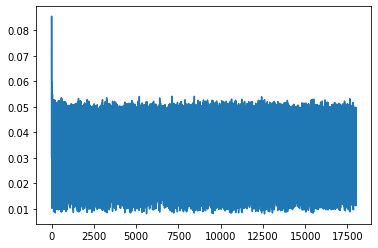

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2769280521241325 and MAE 0.4996728742304758 CC: 0.022465855106391184


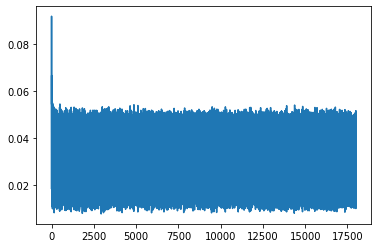

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2803817818128841 and MAE 0.49964951930433027 CC: 0.0250970165357777


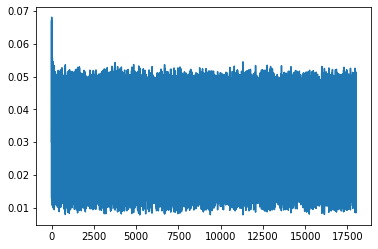

Batch: <function MB_gradient_descent at 0x7f913071bf80> 0.2866038584265392 and MAE 0.4995946095346115 CC: 0.054982980457685376


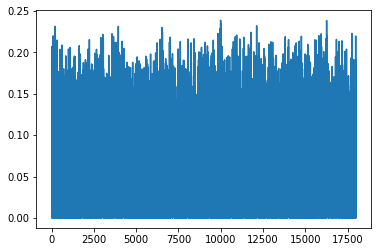

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2621853199882354 and MAE 0.5003337014294436 CC: -0.0031114008938126657


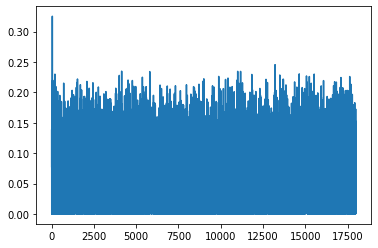

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2520398857025311 and MAE 0.49948109573167604 CC: 0.021390032380597928


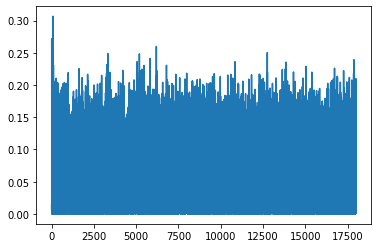

Batch: <function stochastic_gradient_descent at 0x7f91306c5200> 0.2657655532881639 and MAE 0.49921057080744224 CC: 0.07617270119477955


In [52]:
# Implement Grid Search to find optimal parameters

alphas = [0.001,0.1,0.05]
lambs = [0.3,0.5,0.01]
iterationss = [10000,12000,18000]
batch_size = 40

for alpha in alphas:
  for lamb in lambs:
    for iters in iterationss:
      for algorithm in [batch_gradient_descent, MB_gradient_descent, stochastic_gradient_descent]: # three algos
        for j in range(3): # 3 kinds of regularisation
          if j == 0: ## no regularisation
            lamb = 0
            if algorithm == MB_gradient_descent:
              calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb)
            else:
              calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb)
            plt.plot(range(iters),J_his)
            plt.show()
            pr = make_pred(calc_w)
            print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
          elif j == 1: ## l2 reg
            if algorithm == MB_gradient_descent:
              calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = True)
            else:
              calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = True)
            plt.plot(range(iters),J_his)
            plt.show()
            pr = make_pred(calc_w)
            print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
          else:
            if algorithm == MB_gradient_descent:
              calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = False)
            else:
              calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = False)
            plt.plot(range(iters),J_his)
            plt.show()
            pr = make_pred(calc_w)
            print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
